In [12]:
import os
import numpy as np
from skimage.io import imread
from skimage.io import imsave
from glob import glob
import matplotlib.pyplot as plt
from skimage.util import invert
import skimage.color as color
import torch
import torch.nn as nn
from imgaug import augmenters as iaa
from data import default_loader_custom
import h5py

In [13]:
def load_pic(path):
    pic = imread(path)
    class_name = get_class(path)
    print("pic ",path," shape is ",pic.shape)
    if class_name == "malaria":
        pic = color.rgb2grey(pic)
        pic = invert(pic)
    elif class_name == "Human_HT29_colon-cancer" or class_name == "dna":
        #pic = color.rgb2grey(pic)
        pass
    elif class_name == "dp":
        pic = color.rgba2rgb(pic)
        pic = color.rgb2grey(pic)
        
    if (pic.dtype == 'uint16'):
        #print("anything else than double!!")
        if (pic.max()<32768):
            pic = pic.astype('int16')
        else:
            pic = pic.astype('int32')
    if (False):
        pic = pic.astype('float')


    #if (len(pic.shape)==2):
        #pic = pic.reshape((pic.shape[0], pic.shape[1],1))
        #pic = np.repeat(pic, 3, axis=-1)
    if (pic.shape[0]==3):
        #print("**************3 IS BACK: ",pic.shape)
        pic = pic.transpose() #Not sure this is correct to get from (y,x,3) to (3,y,x)
    
    #==========RESHAPING=============
    shorter_side = min(pic.shape[0], pic.shape[1])
    if (class_name == "Hela"):
        shorter_side = shorter_side//8
    if (class_name == "mSar"):
        shorter_side = shorter_side//6
    if (class_name == "malaria"):
        shorter_side = shorter_side//4
    if (class_name == "Human_Hepatocyte_Murine_Fibroblast"):
        shorter_side = int(shorter_side/2)
    else:
        #shorter_side = 256
        pass
    scale = iaa.Resize({"shorter-side":shorter_side, "longer-side":"keep-aspect-ratio"}).augment_image
    pic = scale(pic)
         
    #===========CROP==================    
    crop = iaa.CropToFixedSize(width=256, height=256, position = 'center', seed = 0).augment_image
    pic  = crop(pic)
    #==========TO [0,1]=============
    pic = pic/pic.max()
    
    return pic

def get_class(path):
    return path.split('/')[-2]

In [14]:
def load(path):
    pic = default_loader_custom(path)
    #===========CROP==================    
    crop = iaa.CropToFixedSize(width=256, height=256).augment_image
    pic  = crop(pic)
    #==========TO [0,1]=============
    pic = pic/pic.max()
    
    return pic

In [23]:
def getImgs(pth, dataType):
    return glob(os.path.join(pth, dataType))

dir_path = "../../../scratch/slivinskiy/SOFI/test"
classes = next(os.walk(dir_path))[1]
pth_list = []

for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    pth_list.append(cls_imgs)

print(len(pth_list))

26


classes:   26
Class 2 :  mCherry
pic  ../../../scratch/slivinskiy/SOFI/test/mCherry/mCherry_screen_UV1pct_07.tif  shape is  (512, 512)
PICS IN CLASS:  12
Class 3 :  rsGreen1
pic  ../../../scratch/slivinskiy/SOFI/test/rsGreen1/rsGreen1_screen_UV1pct_35.tif  shape is  (512, 512)
PICS IN CLASS:  12
Class 4 :  EYFP
pic  ../../../scratch/slivinskiy/SOFI/test/EYFP/EYFP_screen_UV0pct_01.tif  shape is  (512, 512)
PICS IN CLASS:  8
Class 5 :  mTFP
pic  ../../../scratch/slivinskiy/SOFI/test/mTFP/mTFP_screen_UV1pct_36.tif  shape is  (512, 512)
PICS IN CLASS:  12
Class 6 :  mNeonGreen
pic  ../../../scratch/slivinskiy/SOFI/test/mNeonGreen/mNeonGreen_screen_UV10pct_12.tif  shape is  (512, 512)
PICS IN CLASS:  12
Class 7 :  rsTagRFP
pic  ../../../scratch/slivinskiy/SOFI/test/rsTagRFP/rsTagRFP_screen_UV0pct_18.tif  shape is  (512, 512)
PICS IN CLASS:  12
Class 8 :  rsFusionRed
pic  ../../../scratch/slivinskiy/SOFI/test/rsFusionRed/rsFusionRed_screen_UV1pct_06.tif  shape is  (512, 512)
PICS IN CLASS:  

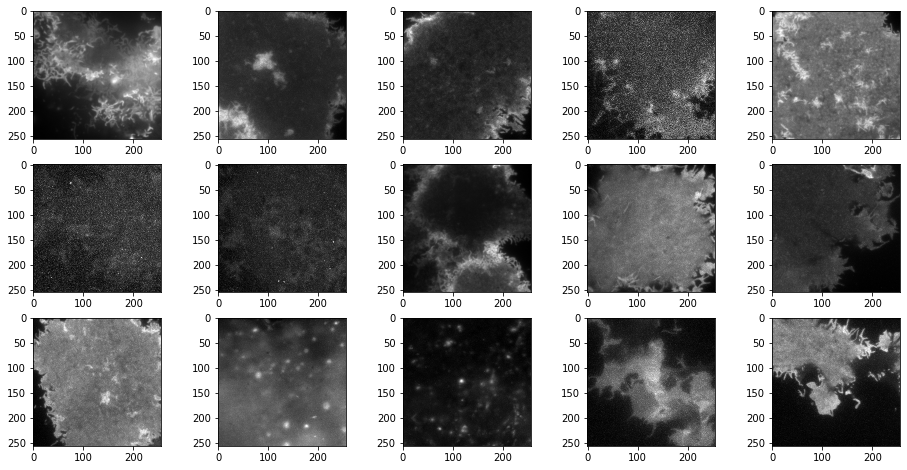

In [32]:
fig=plt.figure(figsize=(16, 8))
index = 1
columns = 5
rows = 3
j = 0
print("classes:  ",len(classes))
for i in range(1, columns*rows +1):
    if (classes[j].split("_")[0] == "h5"):
        j+=1
    if j>= len(pth_list):
        break
    print("Class", j+1,": ",classes[j])
    img = load_pic(pth_list[j][index])
    print("PICS IN CLASS: ",len(pth_list[j]))
    #img = img.transpose()
    #img = img[2]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
plt.show()

pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_G04_s8_w586CCAAA9-A1AF-4C8D-8636-799E31299153.tif  shape is  (520, 696)
pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_L17_s2_w5C09E75BC-85CD-48EE-A564-50B9CEEC91C8.tif  shape is  (520, 696)
pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_P15_s2_w5254BBAEE-454E-492A-94DB-41B8D86A7E6A.tif  shape is  (520, 696)
pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_L01_s3_w5D9E44E02-9298-4CFC-8EEE-5C033B08DA76.tif  shape is  (520, 696)
pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_P19_s5_w5EDCF7FB1-6A02-4E6A-B0A6-7B9D65104EC1.tif  shape is  (520, 696)
pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_G09_s8_w5A48167AC-FB55-4308-8968-96C79198B989.tif  shape is  (520, 696)
pic  ../../../scratch/slivinskiy/new_datasets/BBBC022_v1_images_20590w5/IXMtest_C14_s3_w

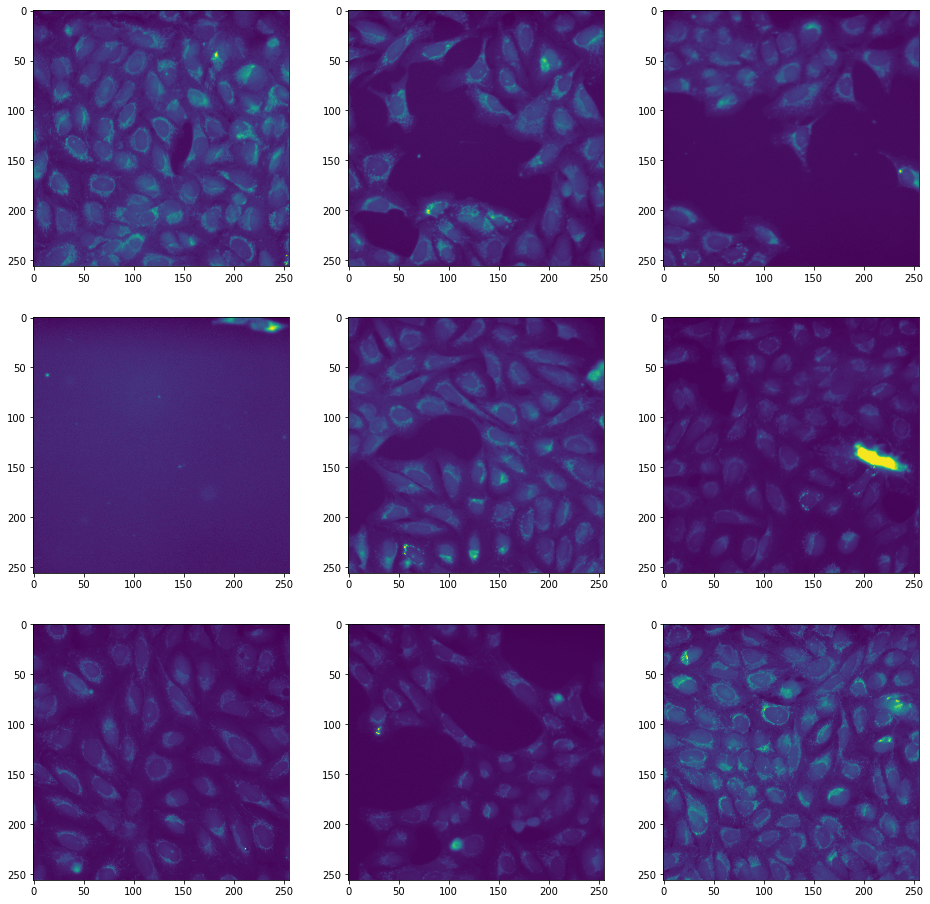

In [156]:
fig=plt.figure(figsize=(16, 16))
index = 6
columns = 3
rows = 3
j = 0
for i in range(1, columns*rows +1):
    img = load_pic(pth_list[7][j+10])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    j+=1
plt.show()

In [53]:
dir_path = "../../../scratch/bunk/cell2cell/test/A"
fol1 = "malaria"
fol2 = "Human_HT29_colon-cancer"
fol3 = "Hela"
fol4 = "dp"

impath_malaria = os.path.join(dir_path, fol1)
impath_malaria = os.path.join(impath_malaria, "*.png")
imlist_malaria = glob(impath_malaria)

impath_colon = os.path.join(dir_path, fol2)
impath_colon = os.path.join(impath_colon, "*.DIB")
imlist_colon = glob(impath_colon)

impath_hela = os.path.join(dir_path, fol3)
impath_hela = os.path.join(impath_hela, "*.tif")
imlist_hela = glob(impath_hela)

impath_dp = os.path.join(dir_path, fol4)
impath_dp = os.path.join(impath_dp, "*.png")
imlist_dp = glob(impath_dp)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def two2three(pic):
    if (len(pic.shape)==2):
        print(pic.shape)
        pic = pic.reshape((pic.shape[0], pic.shape[1],1))
        pic = np.repeat(pic, 3, axis=-1)
    if (pic.shape[0]==3):
        #print("**************3 IS BACK: ",pic.shape)
        pic = pic.transpose() #Not sure this is correct to get from (y,x,3) to (3,y,x)
    return pic

input arr shape:  (256, 256, 4)
(256, 256, 4)


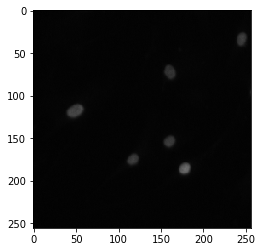

In [4]:
arr = imread(imlist_dp[16])
print("input arr shape: ",arr.shape)
#arr = ski.rgba2rgb(arr)
#arr = ski.rgb2grey(arr)
#arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

In [5]:
arr = imread(imlist_malaria[0])
print("input arr shape: ",arr.shape)
arr = ski.rgba2rgb(arr)
arr = ski.rgb2grey(arr)
arr = invert(arr)
arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

input arr shape:  (1200, 1600, 3)


ValueError: the input array must have a shape == (.., ..,[ ..,] 4)), got (1200, 1600, 3)

input arr shape:  (1600, 1200)
(1600, 1200)


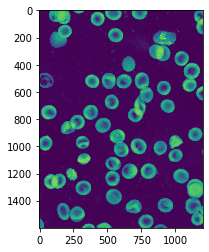

In [6]:
arr = imread(imlist_malaria[0])
arr = (arr.transpose())[0]
print("input arr shape: ",arr.shape)
arr = ski.rgb2grey(arr)
arr = invert(arr)
print(arr.shape)
plt.imshow(arr)

input arr shape:  (512, 512, 3)
(512, 512)
(512, 512, 3)


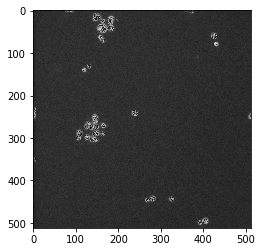

In [7]:
arr = imread(imlist_colon[0])
print("input arr shape: ",arr.shape)
arr = ski.rgb2grey(arr)
#arr = invert(arr)
arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

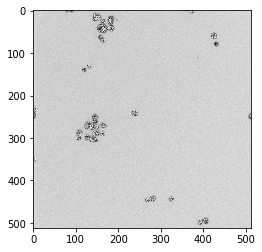

In [8]:
arr = invert(arr)
plt.imshow(arr)

In [9]:
class PrintLayer(nn.Module):
    def __init__(self, index, fig, **kwargs):
        super().__init__(**kwargs)
        self.index = index
        self.fig = fig

    def forward(self, x):
        y=x.detach().cpu().numpy().reshape(512,512,6)
        y1 = y[::1, ::1, 0:3:1]
        y2 = y[::1, ::1, 3:6:1]
        self.fig.add_subplot(4, 4, self.index)
        plt.imshow(y1)
        self.fig.add_subplot(4, 4, self.index+1)
        plt.imshow(y2)
        return x

In [10]:
class TestNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TestNet, self).__init__()
        
        self.fig=plt.figure(figsize=(16, 16))
    
        
        model = [
            nn.Flatten(start_dim=0, end_dim=1),
            nn.Linear(D_in, H),
            PrintLayer(1, self.fig),
            nn.ReLU(inplace=True),
            PrintLayer(3, self.fig),
            nn.Linear(H, D_out),
            #PrintLayer(5, self.fig)
        ]
        
        self.model = nn.Sequential(*model
        )

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        y = self.model(x)
        y = y.reshape(x.shape)
        return y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 2)
DONE
torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


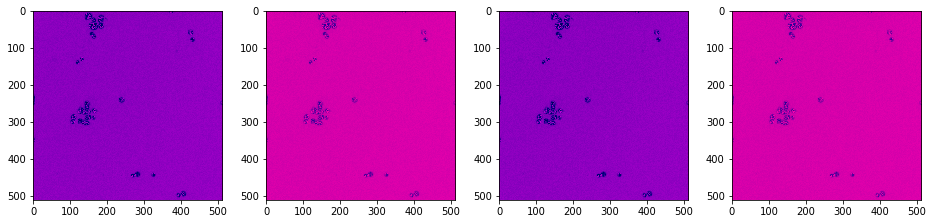

In [11]:
net = TestNet(3, 6, 3)
test = arr
print(arr[::1, ::1, 0:2:1].shape)
print("DONE")
test = torch.Tensor(test)
print(test.shape)
y = net(test)
print(y.shape)
plt.show()

In [3]:
import blocks
import torch
from torch import nn

In [1]:
import blocks
import torch
from torch import nn
x = blocks.InceptionBlock(3, 100, 3, 1)
z = blocks.Conv2dBlock(3,100,3,1)
y = torch.ones((2, 3,12,12))
res = x(y)
print(res.shape)
res2 = z(y)
print(res2.shape)

BLOCKS, INCEPTIONBLOCK: BE AWARE THAT THE CONV2DBLOCK DIDN'T PAD AS MUCH AS THIS ONE
l shape torch.Size([2, 12, 12, 12])
r shape torch.Size([2, 13, 12, 12])
torch.Size([2, 100, 12, 12])
torch.Size([2, 100, 10, 10])


In [2]:
import utils
from globalConstants import GlobalConstants

In [4]:
GlobalConstants.setPrecision("float16_apex")
bs = 4
train_content_loader = utils.create_loader(".",
                            "../../../scratch/bunk/cell2cell/test/A",
                            10,
                            10,
                            desired_size=256,
                            resize_shorter_side=300,
                            num_classes=8,
                            batch_size=bs)
train_class_loader = utils.create_loader(".",
                            "../../../scratch/bunk/cell2cell/test/A",
                            10,
                            10,
                            desired_size=256,
                            resize_shorter_side=300,
                            num_classes=8,
                            batch_size=bs,
                            num_workers=0)

Using APEX
Set precision to: torch.float16
Data loader
	Root: .
	Number of images: 1975
	Classes:  ['Hela', 'synthetic_BBBC004', 'Human_USOS_P_20585', 'malaria', 'dp', 'mSar', 'Human_HT29_Colon_Cancer_DNA', 'Human_Hepatocyte_Murine_Fibroblast']
	Number of classes: 8
Data loader
	Root: .
	Number of images: 1975
	Classes:  ['Hela', 'synthetic_BBBC004', 'Human_USOS_P_20585', 'malaria', 'dp', 'mSar', 'Human_HT29_Colon_Cancer_DNA', 'Human_Hepatocyte_Murine_Fibroblast']
	Number of classes: 8


torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])


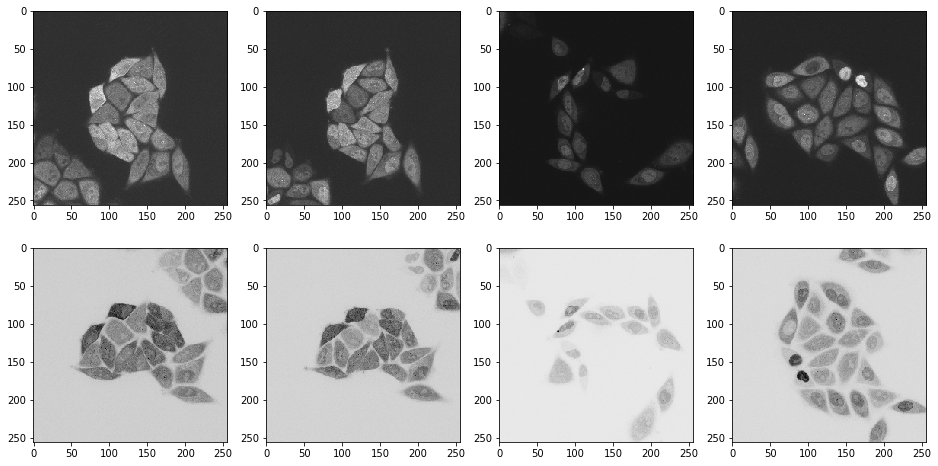

In [26]:
#torch.manual_seed(10000)
    torch.backends.cudnn.deterministic = True
for it, (co_data, cl_data) in enumerate(zip(train_content_loader, train_class_loader)):
    fig=plt.figure(figsize=(16, 8))
    columns = 4
    rows = 2
    j = 0
    print(co_data[0].shape)
    print(cl_data[0].shape)
    for run in range(2):
        if run == 0:
            data = co_data[0]
        else:
            data = cl_data[0]
            for y in range(len(data)):
                data[y] = -1*data[y].transpose(1,2) +1
        for i in range(1, bs+1):
            fig.add_subplot(rows,columns, i+bs*run)
            img = data[i-1]
            img = img.transpose(0, 2)
            plt.imshow(img)
    plt.show()
    """
    for i in range(1, columns*rows +1):
        if j>= len(pth_list):
            break
        print("Class", j+1,": ",classes[j])
        img = load_pic(pth_list[j][index])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    """
    j+=1
    break

In [ ]:
for run in range(2):
    if run == 0:
        data = co_data[0]
    else:
        data = cl_data[0]
    for i in range(1, bs+1):

72
IS SHAPE:  (2048, 2048)
SHOULD BE:  (1608, 1608)


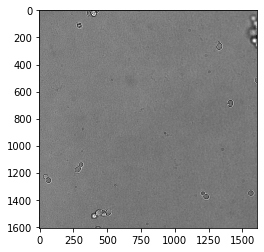

In [57]:
dir_path = "../../../scratch/slivinskiy/cycleGAN/train/A"
save_path = "../../../scratch/slivinskiy/cycleGAN/train/C"
reference_path = "../../../scratch/slivinskiy/cycleGAN/train/B"

pth_list = []
imgs = getImgs(dir_path, "*.tif")
pth_list.append(imgs)

reference_list = []
reference_imgs = getImgs(reference_path, "*.tif")
reference_list.append(reference_imgs)

print(len(pth_list[0]))
print("IS SHAPE: ",imread(pth_list[0][0]).shape)
print("SHOULD BE: ", imread(reference_list[0][0]).shape)
pic = loadAndCrop(pth_list[0][0])

In [72]:
for pth in pth_list[0]:
    name = pth.split("/")[-1]
    pic = loadAndCrop(pth)
    safepath = os.path.join(save_path, name)
    imsave(safepath, pic)

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


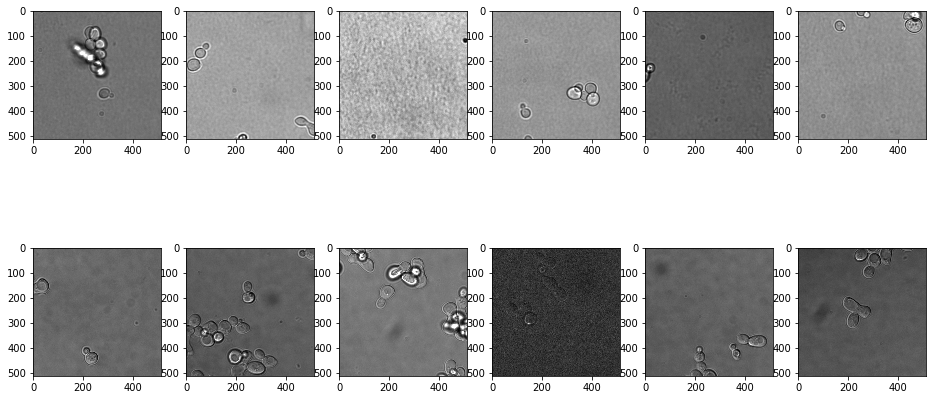

In [66]:
fig=plt.figure(figsize=(16, 8))
index = 35
columns = 6
rows = 2
offset = 10
j = 0
for i in range(1, columns*rows +1):
    img = cropTo(loadAndCrop(pth_list[0][j+offset]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
j=0
for i in range(columns+1, columns*rows +1):
    img = cropTo(imread(reference_list[0][j+offset]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
plt.show()

In [49]:
def loadAndCrop(path):
    pic = imread(path)
    
    crop = iaa.CropToFixedSize(width=1608, height=1608).augment_image
    pic  = crop(pic)
    return pic

In [58]:
def cropTo(pic):
    crop = iaa.CropToFixedSize(width=512, height=512).augment_image
    pic  = crop(pic)
    return pic

# **Conversion of h5 format to tif**

In [63]:
path = "../../../scratch/bunk/BIA083/ff1c4def44b78b2b18ed0217a90f95be.h5"
pathOut = "../../../scratch/slivinskiy/h5TotifDataSet2"
h5 = h5py.File(path, 'r')
dataset = h5['experiment']
print(dataset.keys())

<KeysViewHDF5 ['overview0', 'overview1', 'overview10', 'overview100', 'overview101', 'overview102', 'overview103', 'overview104', 'overview105', 'overview106', 'overview107', 'overview108', 'overview109', 'overview11', 'overview110', 'overview111', 'overview112', 'overview113', 'overview114', 'overview115', 'overview116', 'overview117', 'overview118', 'overview119', 'overview12', 'overview120', 'overview121', 'overview122', 'overview123', 'overview124', 'overview125', 'overview126', 'overview127', 'overview128', 'overview129', 'overview13', 'overview130', 'overview131', 'overview132', 'overview133', 'overview134', 'overview135', 'overview136', 'overview137', 'overview138', 'overview139', 'overview14', 'overview140', 'overview141', 'overview142', 'overview143', 'overview144', 'overview145', 'overview146', 'overview147', 'overview148', 'overview149', 'overview15', 'overview150', 'overview151', 'overview152', 'overview153', 'overview154', 'overview155', 'overview156', 'overview157', 'over

<KeysViewHDF5 ['0', '1', '2', '3']>
<HDF5 dataset "0": shape (1, 7, 300, 300), type "<i2">
<HDF5 dataset "0": shape (1, 7, 300, 300), type "<i2">
<HDF5 dataset "0": shape (1, 7, 300, 300), type "<i2">
float64
overview0 0 0 (300, 300)
overview0 0 1 (300, 300)
overview0 0 2 (300, 300)
overview0 0 3 (300, 300)
overview1 0 0 (300, 300)


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:15: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  from ipykernel import kernelapp as app


overview1 0 1 (300, 300)
overview1 0 2 (300, 300)
overview1 0 3 (300, 300)
overview10 0 0 (300, 300)
overview10 0 1 (300, 300)
overview10 0 2 (300, 300)
overview10 0 3 (300, 300)
overview100 0 0 (300, 300)
overview100 0 1 (300, 300)
overview100 0 2 (300, 300)
overview100 0 3 (300, 300)


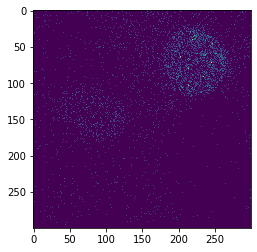

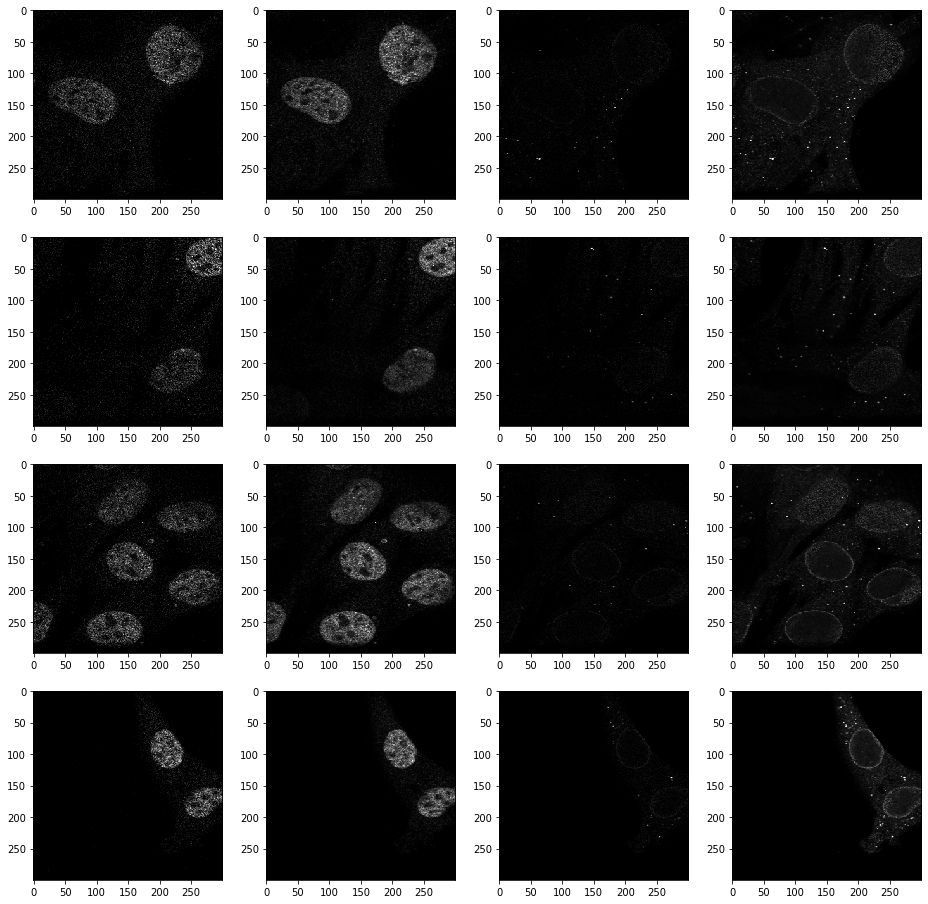

In [90]:
pic0 = dataset['overview0']
pic1 = dataset['overview1']
pic2 = dataset['overview2']
pic01 = dataset['overview3']

print(pic0['0'].keys())

pic0 = pic0['0']['0']
plt.imshow(pic0[0][5])
pic1 = pic1['0']['0']
pic2 = pic2['0']['0']
print(pic0)
print(pic1)
print(pic2)
print(pic0.value.astype(float, copy=False).dtype)

fig=plt.figure(figsize=(16, 16))
index = 35
columns = 4
rows = 4
j = 0
for key in dataset:
    for key1 in dataset[key]:
        for key2 in dataset[key][key1]:
            if (j>=columns*rows):
                break
            img = dataset[key][key1][key2]
            if (img.shape[0] == 1 and img.shape[1] == 1):
                img=img[0][0]
            elif (img.shape[0] == 1):
                img=img[0]
                mid = (int)(img.shape[0] / 2)
                img=img[mid]
            print(key, key1, key2, img.shape)
            fig.add_subplot(rows, columns, j+1)
            plt.imshow(img, cmap="gray")
            j+=1
plt.show()

(7, 300, 300)


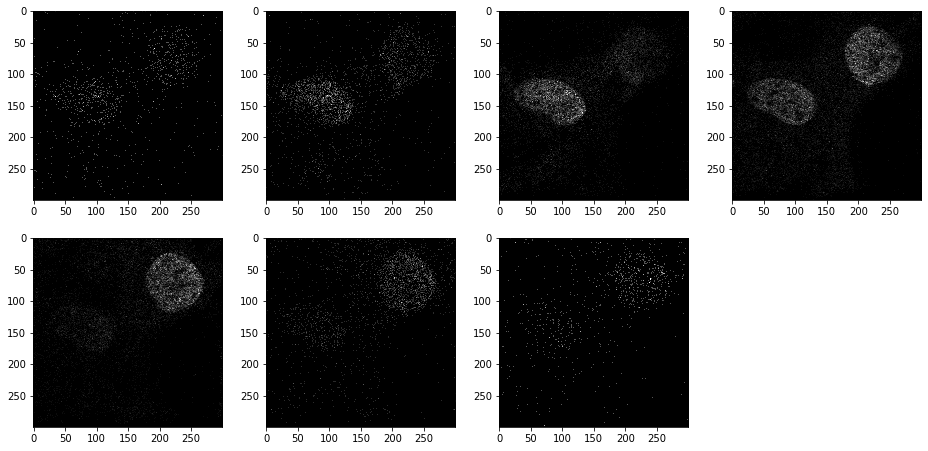

In [77]:
fig=plt.figure(figsize=(16, 16))
index = 35
columns = 4
rows = 4
j = 0
pic0 = dataset['overview0']['0']['0']
pic0 = pic0[0]
print(pic0.shape)
for i in range(pic0.shape[0]):
    if (j>= columns*rows):
        break
    fig.add_subplot(rows, columns, j+1)
    plt.imshow(pic0[i], cmap="gray")
    j+=1
plt.show()

In [92]:
for key in dataset:
    for key1 in dataset[key]:
        for key2 in dataset[key][key1]:
            #print(key, key1, key2)
            #print(dataset[key][key1][key2].shape)
            pic = dataset[key][key1][key2]
            #print("Type: ",pic.dtype)
            name = key+"_"+key2+".tif"
            pic = np.max(pic[0], axis = 0)
            print(name)
            pathSave = os.path.join(pathOut,name)
            print(pathSave)
            imsave(pathSave, pic)


overview0_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview0_0.tif
overview0_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview0_1.tif
overview0_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview0_2.tif
overview0_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview0_3.tif
overview1_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview1_0.tif
overview1_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview1_1.tif
overview1_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview1_2.tif
overview1_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview1_3.tif
overview10_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview10_0.tif
overview10_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview10_1.tif
overview10_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview10_2.tif
overview10_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview10_3.tif
overview100_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview100_0.tif


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview0_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview0_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview0_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview0_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview1_0.tif is a lo

overview109_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview109_1.tif
overview109_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview109_2.tif
overview109_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview109_3.tif
overview11_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview11_0.tif
overview11_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview11_1.tif
overview11_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview11_2.tif
overview11_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview11_3.tif
overview110_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview110_0.tif
overview110_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview110_1.tif
overview110_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview110_2.tif
overview110_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview110_3.tif
overview111_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview111_0.tif
overview111_1.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview109_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview109_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview109_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview11_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview11_1.tif

overview121_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview121_2.tif
overview121_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview121_3.tif
overview122_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview122_0.tif
overview122_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview122_1.tif
overview122_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview122_2.tif
overview122_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview122_3.tif
overview123_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview123_0.tif
overview123_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview123_1.tif
overview123_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview123_2.tif
overview123_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview123_3.tif
overview124_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview124_0.tif
overview124_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview124_1.tif
overview124_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview121_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview121_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview122_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview122_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview122_2.t

overview135_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview135_0.tif
overview135_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview135_1.tif
overview135_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview135_2.tif
overview135_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview135_3.tif
overview136_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview136_0.tif
overview136_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview136_1.tif
overview136_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview136_2.tif
overview136_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview136_3.tif
overview137_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview137_0.tif
overview137_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview137_1.tif
overview137_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview137_2.tif
overview137_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview137_3.tif
overview138_0.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview135_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview135_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview135_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview135_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview136_0.t

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview151_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview151_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview151_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview151_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview152_0.t

overview151_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview151_1.tif
overview151_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview151_2.tif
overview151_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview151_3.tif
overview152_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview152_0.tif
overview152_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview152_1.tif
overview152_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview152_2.tif
overview152_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview152_3.tif
overview153_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview153_0.tif
overview153_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview153_1.tif
overview153_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview153_2.tif
overview153_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview153_3.tif
overview154_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview154_0.tif
overview154_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview167_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview168_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview168_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview168_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview168_3.t

overview168_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview168_0.tif
overview168_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview168_1.tif
overview168_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview168_2.tif
overview168_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview168_3.tif
overview169_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview169_0.tif
overview169_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview169_1.tif
overview169_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview169_2.tif
overview169_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview169_3.tif
overview17_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview17_0.tif
overview17_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview17_1.tif
overview17_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview17_2.tif
overview17_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview17_3.tif
overview170_0.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview183_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview183_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview184_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview184_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview184_2.t

overview183_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview183_3.tif
overview184_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview184_0.tif
overview184_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview184_1.tif
overview184_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview184_2.tif
overview184_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview184_3.tif
overview185_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview185_0.tif
overview185_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview185_1.tif
overview185_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview185_2.tif
overview185_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview185_3.tif
overview186_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview186_0.tif
overview186_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview186_1.tif
overview186_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview186_2.tif
overview186_3.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview2_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview20_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview20_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview20_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview20_3.tif is 

overview20_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview20_0.tif
overview20_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview20_1.tif
overview20_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview20_2.tif
overview20_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview20_3.tif
overview200_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview200_0.tif
overview200_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview200_1.tif
overview200_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview200_2.tif
overview200_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview200_3.tif
overview201_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview201_0.tif
overview201_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview201_1.tif
overview201_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview201_2.tif
overview201_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview201_3.tif
overview202_0.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview215_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview216_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview216_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview216_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview216_3.t

overview216_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview216_0.tif
overview216_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview216_1.tif
overview216_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview216_2.tif
overview216_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview216_3.tif
overview217_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview217_0.tif
overview217_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview217_1.tif
overview217_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview217_2.tif
overview217_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview217_3.tif
overview218_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview218_0.tif
overview218_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview218_1.tif
overview218_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview218_2.tif
overview218_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview218_3.tif
overview219_0.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview232_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview232_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview232_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview232_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview233_0.t

overview232_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview232_1.tif
overview232_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview232_2.tif
overview232_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview232_3.tif
overview233_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview233_0.tif
overview233_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview233_1.tif
overview233_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview233_2.tif
overview233_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview233_3.tif
overview234_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview234_0.tif
overview234_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview234_1.tif
overview234_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview234_2.tif
overview234_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview234_3.tif
overview235_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview235_0.tif
overview235_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview247_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview247_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview248_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview248_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview248_2.t

overview247_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview247_3.tif
overview248_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview248_0.tif
overview248_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview248_1.tif
overview248_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview248_2.tif
overview248_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview248_3.tif
overview249_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview249_0.tif
overview249_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview249_1.tif
overview249_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview249_2.tif
overview249_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview249_3.tif
overview25_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview25_0.tif
overview25_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview25_1.tif
overview25_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview25_2.tif
overview25_3.tif
../../../scratch/slivinskiy/h

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview260_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview260_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview260_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview260_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview261_0.t

overview260_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview260_1.tif
overview260_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview260_2.tif
overview260_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview260_3.tif
overview261_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview261_0.tif
overview261_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview261_1.tif
overview261_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview261_2.tif
overview261_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview261_3.tif
overview262_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview262_0.tif
overview262_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview262_1.tif
overview262_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview262_2.tif
overview262_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview262_3.tif
overview263_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview263_0.tif
overview263_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview273_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview273_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview273_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview274_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview274_1.t

overview273_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview273_2.tif
overview273_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview273_3.tif
overview274_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview274_0.tif
overview274_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview274_1.tif
overview274_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview274_2.tif
overview274_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview274_3.tif
overview275_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview275_0.tif
overview275_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview275_1.tif
overview275_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview275_2.tif
overview275_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview275_3.tif
overview276_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview276_0.tif
overview276_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview276_1.tif
overview276_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview287_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview288_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview288_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview288_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview288_3.t

overview288_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview288_0.tif
overview288_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview288_1.tif
overview288_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview288_2.tif
overview288_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview288_3.tif
overview289_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview289_0.tif
overview289_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview289_1.tif
overview289_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview289_2.tif
overview289_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview289_3.tif
overview29_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview29_0.tif
overview29_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview29_1.tif
overview29_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview29_2.tif
overview29_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview29_3.tif
overview290_0.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview302_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview302_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview303_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview303_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview303_2.t

overview302_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview302_3.tif
overview303_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview303_0.tif
overview303_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview303_1.tif
overview303_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview303_2.tif
overview303_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview303_3.tif
overview304_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview304_0.tif
overview304_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview304_1.tif
overview304_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview304_2.tif
overview304_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview304_3.tif
overview305_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview305_0.tif
overview305_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview305_1.tif
overview305_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview305_2.tif
overview305_3.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview319_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview319_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview319_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview32_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview32_1.tif

overview319_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview319_2.tif
overview319_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview319_3.tif
overview32_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview32_0.tif
overview32_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview32_1.tif
overview32_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview32_2.tif
overview32_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview32_3.tif
overview320_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview320_0.tif
overview320_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview320_1.tif
overview320_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview320_2.tif
overview320_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview320_3.tif
overview321_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview321_0.tif
overview321_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview321_1.tif
overview321_2.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview335_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview335_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview336_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview336_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview336_2.t

overview335_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview335_3.tif
overview336_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview336_0.tif
overview336_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview336_1.tif
overview336_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview336_2.tif
overview336_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview336_3.tif
overview337_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview337_0.tif
overview337_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview337_1.tif
overview337_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview337_2.tif
overview337_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview337_3.tif
overview338_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview338_0.tif
overview338_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview338_1.tif
overview338_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview338_2.tif
overview338_3.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview351_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview352_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview352_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview352_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview352_3.t

overview352_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview352_0.tif
overview352_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview352_1.tif
overview352_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview352_2.tif
overview352_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview352_3.tif
overview353_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview353_0.tif
overview353_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview353_1.tif
overview353_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview353_2.tif
overview353_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview353_3.tif
overview354_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview354_0.tif
overview354_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview354_1.tif
overview354_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview354_2.tif
overview354_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview354_3.tif
overview355_0.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview369_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview369_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview369_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview369_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview37_0.ti

overview385_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview385_0.tif
overview385_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview385_1.tif
overview385_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview385_2.tif
overview385_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview385_3.tif
overview386_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview386_0.tif
overview386_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview386_1.tif
overview386_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview386_2.tif
overview386_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview386_3.tif
overview387_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview387_0.tif
overview387_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview387_1.tif
overview387_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview387_2.tif
overview387_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview387_3.tif
overview388_0.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview385_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview385_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview385_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview385_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview386_0.t

overview400_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview400_1.tif
overview400_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview400_2.tif
overview400_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview400_3.tif
overview401_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview401_0.tif
overview401_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview401_1.tif
overview401_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview401_2.tif
overview401_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview401_3.tif
overview402_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview402_0.tif
overview402_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview402_1.tif
overview402_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview402_2.tif
overview402_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview402_3.tif
overview403_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview403_0.tif
overview403_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview400_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview400_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview400_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview401_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview401_1.t

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview417_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview417_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview417_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview418_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview418_1.t

overview417_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview417_2.tif
overview417_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview417_3.tif
overview418_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview418_0.tif
overview418_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview418_1.tif
overview418_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview418_2.tif
overview418_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview418_3.tif
overview419_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview419_0.tif
overview419_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview419_1.tif
overview419_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview419_2.tif
overview419_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview419_3.tif
overview42_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview42_0.tif
overview42_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview42_1.tif
overview42_2.tif
../../../scratch/slivinskiy

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview433_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview433_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview434_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview434_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview434_2.t

overview433_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview433_3.tif
overview434_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview434_0.tif
overview434_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview434_1.tif
overview434_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview434_2.tif
overview434_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview434_3.tif
overview435_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview435_0.tif
overview435_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview435_1.tif
overview435_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview435_2.tif
overview435_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview435_3.tif
overview436_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview436_0.tif
overview436_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview436_1.tif
overview436_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview436_2.tif
overview436_3.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview445_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview445_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview445_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview446_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview446_1.t

overview445_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview445_2.tif
overview445_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview445_3.tif
overview446_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview446_0.tif
overview446_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview446_1.tif
overview446_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview446_2.tif
overview446_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview446_3.tif
overview447_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview447_0.tif
overview447_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview447_1.tif
overview447_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview447_2.tif
overview447_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview447_3.tif
overview448_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview448_0.tif
overview448_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview448_1.tif
overview448_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview459_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview459_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview459_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview459_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview46_0.ti

overview459_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview459_1.tif
overview459_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview459_2.tif
overview459_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview459_3.tif
overview46_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview46_0.tif
overview46_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview46_1.tif
overview46_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview46_2.tif
overview46_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview46_3.tif
overview460_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview460_0.tif
overview460_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview460_1.tif
overview460_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview460_2.tif
overview460_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview460_3.tif
overview461_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview461_0.tif
overview461_1.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview471_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview472_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview472_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview472_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview472_3.t

overview472_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview472_0.tif
overview472_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview472_1.tif
overview472_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview472_2.tif
overview472_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview472_3.tif
overview473_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview473_0.tif
overview473_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview473_1.tif
overview473_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview473_2.tif
overview473_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview473_3.tif
overview474_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview474_0.tif
overview474_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview474_1.tif
overview474_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview474_2.tif
overview474_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview474_3.tif
overview475_0.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview486_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview486_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview486_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview486_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview487_0.t

overview486_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview486_2.tif
overview486_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview486_3.tif
overview487_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview487_0.tif
overview487_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview487_1.tif
overview487_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview487_2.tif
overview487_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview487_3.tif
overview488_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview488_0.tif
overview488_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview488_1.tif
overview488_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview488_2.tif
overview488_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview488_3.tif
overview489_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview489_0.tif
overview489_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview489_1.tif
overview489_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview501_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview502_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview502_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview502_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview502_3.t

overview502_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview502_1.tif
overview502_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview502_2.tif
overview502_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview502_3.tif
overview503_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview503_0.tif
overview503_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview503_1.tif
overview503_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview503_2.tif
overview503_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview503_3.tif
overview504_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview504_0.tif
overview504_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview504_1.tif
overview504_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview504_2.tif
overview504_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview504_3.tif
overview505_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview505_0.tif
overview505_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview519_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview519_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview52_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview52_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview52_2.tif 

overview52_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview52_0.tif
overview52_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview52_1.tif
overview52_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview52_2.tif
overview52_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview52_3.tif
overview520_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview520_0.tif
overview520_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview520_1.tif
overview520_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview520_2.tif
overview520_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview520_3.tif
overview521_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview521_0.tif
overview521_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview521_1.tif
overview521_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview521_2.tif
overview521_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview521_3.tif
overview522_0.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview536_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview536_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview536_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview536_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview537_0.t

overview536_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview536_2.tif
overview536_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview536_3.tif
overview537_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview537_0.tif
overview537_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview537_1.tif
overview537_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview537_2.tif
overview537_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview537_3.tif
overview538_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview538_0.tif
overview538_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview538_1.tif
overview538_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview538_2.tif
overview538_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview538_3.tif
overview539_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview539_0.tif
overview539_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview539_1.tif
overview539_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview553_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview553_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview553_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview553_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview554_0.t

overview553_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview553_2.tif
overview553_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview553_3.tif
overview554_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview554_0.tif
overview554_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview554_1.tif
overview554_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview554_2.tif
overview554_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview554_3.tif
overview555_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview555_0.tif
overview555_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview555_1.tif
overview555_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview555_2.tif
overview555_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview555_3.tif
overview556_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview556_0.tif
overview556_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview556_1.tif
overview556_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview570_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview570_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview570_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview570_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview571_0.t

overview570_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview570_2.tif
overview570_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview570_3.tif
overview571_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview571_0.tif
overview571_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview571_1.tif
overview571_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview571_2.tif
overview571_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview571_3.tif
overview572_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview572_0.tif
overview572_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview572_1.tif
overview572_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview572_2.tif
overview572_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview572_3.tif
overview573_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview573_0.tif
overview573_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview573_1.tif
overview573_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview588_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview588_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview588_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview588_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview589_0.t

overview588_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview588_2.tif
overview588_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview588_3.tif
overview589_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview589_0.tif
overview589_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview589_1.tif
overview589_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview589_2.tif
overview589_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview589_3.tif
overview59_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview59_0.tif
overview59_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview59_1.tif
overview59_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview59_2.tif
overview59_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview59_3.tif
overview590_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview590_0.tif
overview590_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview590_1.tif
overview590_2.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview603_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview604_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview604_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview604_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview604_3.t

overview604_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview604_1.tif
overview604_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview604_2.tif
overview604_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview604_3.tif
overview605_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview605_0.tif
overview605_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview605_1.tif
overview605_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview605_2.tif
overview605_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview605_3.tif
overview606_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview606_0.tif
overview606_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview606_1.tif
overview606_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview606_2.tif
overview606_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview606_3.tif
overview607_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview607_0.tif
overview607_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview620_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview620_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview620_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview620_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview621_0.t

overview620_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview620_2.tif
overview620_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview620_3.tif
overview621_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview621_0.tif
overview621_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview621_1.tif
overview621_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview621_2.tif
overview621_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview621_3.tif
overview622_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview622_0.tif
overview622_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview622_1.tif
overview622_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview622_2.tif
overview622_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview622_3.tif
overview623_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview623_0.tif
overview623_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview623_1.tif
overview623_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview637_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview638_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview638_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview638_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview638_3.t

overview638_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview638_1.tif
overview638_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview638_2.tif
overview638_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview638_3.tif
overview639_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview639_0.tif
overview639_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview639_1.tif
overview639_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview639_2.tif
overview639_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview639_3.tif
overview64_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview64_0.tif
overview64_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview64_1.tif
overview64_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview64_2.tif
overview64_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview64_3.tif
overview640_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview640_0.tif
overview640_1.tif
../../../scratch/slivinskiy/h5

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview655_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview655_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview655_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview655_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview656_0.t

overview655_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview655_2.tif
overview655_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview655_3.tif
overview656_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview656_0.tif
overview656_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview656_1.tif
overview656_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview656_2.tif
overview656_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview656_3.tif
overview657_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview657_0.tif
overview657_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview657_1.tif
overview657_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview657_2.tif
overview657_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview657_3.tif
overview658_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview658_0.tif
overview658_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview658_1.tif
overview658_2.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview671_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview672_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview672_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview672_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview672_3.t

overview672_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview672_1.tif
overview672_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview672_2.tif
overview672_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview672_3.tif
overview673_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview673_0.tif
overview673_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview673_1.tif
overview673_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview673_2.tif
overview673_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview673_3.tif
overview674_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview674_0.tif
overview674_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview674_1.tif
overview674_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview674_2.tif
overview674_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview674_3.tif
overview675_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview675_0.tif
overview675_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview69_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview69_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview69_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview69_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview690_0.tif i

overview69_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview69_2.tif
overview69_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview69_3.tif
overview690_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview690_0.tif
overview690_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview690_1.tif
overview690_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview690_2.tif
overview690_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview690_3.tif
overview691_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview691_0.tif
overview691_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview691_1.tif
overview691_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview691_2.tif
overview691_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview691_3.tif
overview692_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview692_0.tif
overview692_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview692_1.tif
overview692_2.tif
../../../scratch/slivinski

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview706_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview706_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview707_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview707_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview707_2.t

overview706_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview706_3.tif
overview707_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview707_0.tif
overview707_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview707_1.tif
overview707_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview707_2.tif
overview707_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview707_3.tif
overview708_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview708_0.tif
overview708_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview708_1.tif
overview708_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview708_2.tif
overview708_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview708_3.tif
overview709_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview709_0.tif
overview709_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview709_1.tif
overview709_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview709_2.tif
overview709_3.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview723_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview724_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview724_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview724_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview724_3.t

overview724_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview724_0.tif
overview724_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview724_1.tif
overview724_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview724_2.tif
overview724_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview724_3.tif
overview725_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview725_0.tif
overview725_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview725_1.tif
overview725_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview725_2.tif
overview725_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview725_3.tif
overview726_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview726_0.tif
overview726_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview726_1.tif
overview726_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview726_2.tif
overview726_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview726_3.tif
overview727_0.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview740_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview741_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview741_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview741_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview741_3.t

overview741_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview741_1.tif
overview741_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview741_2.tif
overview741_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview741_3.tif
overview742_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview742_0.tif
overview742_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview742_1.tif
overview742_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview742_2.tif
overview742_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview742_3.tif
overview743_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview743_0.tif
overview743_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview743_1.tif
overview743_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview743_2.tif
overview743_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview743_3.tif
overview744_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview744_0.tif
overview744_1.tif
../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview82_2.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview82_3.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview83_0.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview83_1.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview83_2.tif is

overview83_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview83_0.tif
overview83_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview83_1.tif
overview83_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview83_2.tif
overview83_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview83_3.tif
overview84_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview84_0.tif
overview84_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview84_1.tif
overview84_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview84_2.tif
overview84_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview84_3.tif
overview85_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview85_0.tif
overview85_1.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview85_1.tif
overview85_2.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview85_2.tif
overview85_3.tif
../../../scratch/slivinskiy/h5TotifDataSet2/overview85_3.tif
overview86_0.tif
../../../scratch/slivinskiy/h5TotifDataSet2/ove

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/h5TotifDataSet2/overview99_3.tif is a low contrast image
  del sys.path[0]


# **Inspecting the SOFI FILESET**

In [174]:
dir_path = "../../../scratch/slivinskiy/SOFI"
pathOut = "../../../scratch/slivinskiy/SOFI_prepared"
classes = next(os.walk(dir_path))[1]
pth_list = []

for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    pth_list.append(cls_imgs)

print(pth_list[0])
print(len(pth_list[0])+len(pth_list[1])+len(pth_list[2])+len(pth_list[3])+len(pth_list[4]))

[]


IndexError: list index out of range

In [175]:
fig=plt.figure(figsize=(16, 16))
index = 35
columns = 4
rows = 5
j = 0
for row_i in range(rows):
    print("Avaiable pics in this row: ",len(pth_list[row_i]))
    for column_i in range(columns):
        if j>= columns*rows:
            break
        print("Row: ",row_i," Col: ",column_i)
        print("Index: ",row_i,column_i,"Name: ",pth_list[row_i][column_i])
        print("Class name: ",pth_list[row_i][column_i].split("/")[-1].split("_")[0])
        img = np.max(load_pic(pth_list[row_i][column_i]), axis=0)
        fig.add_subplot(rows,columns,j+1)
        plt.imshow(img)
        j+=1
plt.show()

Avaiable pics in this row:  0
Row:  0  Col:  0


IndexError: list index out of range

<Figure size 1152x1152 with 0 Axes>

In [43]:
for row in pth_list:
    for img_path in row:
        cls = img_path.split("/")[-1].split("_")[0]
        name = img_path.split("/")[-1]
        cls_dir = os.path.join(pathOut, cls)
        if (not os.path.exists(cls_dir)):
            print("Encountered new Class: ",cls)
            os.mkdir(cls_dir)
        img_save_path = os.path.join(cls_dir, name)
        pic = imread(img_path)
        pic = np.max(pic, axis = 0)
        #print("About to safe: ",img_save_path,"With shape: ",pic.shape)
        imsave(img_save_path, pic)

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV0pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYP/EYP_screen_UV1pct_21.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV1pct_17.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV0pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scra

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV10pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV10pct_33.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYFP/EYFP_screen_UV0pct_29.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV1pct_20.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCherry/mCherry_screen_UV0pct_24.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYP/EYP_screen_UV1pct_01.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV0pct_02.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV1pct_39.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../sc

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV1pct_38.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV10pct_31.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYFP/EYFP_screen_UV0pct_38.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCherry/mCherry_screen_UV10pct_24.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV1pct_15.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV0pct_03.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCherry/mCherry_screen_UV0pct_08.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV0pct_17.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: .

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYFP/EYFP_screen_UV0pct_04.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV0pct_26.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCherry/mCherry_screen_UV0pct_33.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV0pct_17.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV1pct_25.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV10pct_15.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV0pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYFP/EYFP_screen_UV10pct_11.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV1pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV10pct_36.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV0pct_12.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EGFP/EGFP_screen_UV1pct_37.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../s

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EYFP/EYFP_screen_UV10pct_08.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV1pct_30.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV10pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mEos32/mEos32_screen_UV1pct_10.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: .

Encountered new Class:  ffDronpa
Encountered new Class:  mKO2


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV0pct_10.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  mCerulean


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV1pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_22.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  EBFP2


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_33.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV1pct_24.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV0pct_07.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV10pct_07.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV10pct_19.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV10pct_30.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV1pct_12.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_18.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_11.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV10pct_13.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV0pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV0pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV10pct_36.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV10pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV1pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarn

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_34.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_17.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV0pct_38.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_04.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV10pct_02.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_01.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_08.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV1pct_21.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_33.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV1pct_07.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_39.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserW

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/EBFP2/EBFP2_screen_20.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mKO2/mKO2_screen_UV1pct_37.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/ffDronpa/ffDronpa_screen_UV0pct_01.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mCerulean/mCerulean_screen_UV10pct_21.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: .

Encountered new Class:  rsTagRFP


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV10pct_35.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV0pct_25.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV0pct_37.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  mTurq


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV10pct_24.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  TagBFP


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/TagBFP/TagBFP_screen_36.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/TagBFP/TagBFP_screen_07.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  rsFusionRed


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV1pct_03.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV10pct_00.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV0pct_08.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_29.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launc

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV10pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/TagBFP/TagBFP_screen_38.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV1pct_34.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV10pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV1pct_39.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_37.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV10pct_05.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/TagBFP/TagBFP_screen_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.p

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV0pct_36.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV0pct_36.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV10pct_02.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV0pct_11.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWar

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV0pct_25.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV1pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV1pct_18.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV1pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: .

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV10pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV10pct_01.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV1pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykerne

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV10pct_04.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV1pct_25.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV0pct_34.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV1pct_30.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipy

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV0pct_26.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsTagRFP/rsTagRFP_screen_UV1pct_15.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_05.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV1pct_13.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV10pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV10pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/TagBFP/TagBFP_screen_12.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_12.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsFusionRed/rsFusionRed_screen_UV0pct_18.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV1pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTurq/mTurq_screen_UV1pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:

Encountered new Class:  mNeonGreen
Encountered new Class:  rsGreen1


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV0pct_37.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  mOrange2


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV1pct_30.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  mScarletI


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV1pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV10pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV1pct_05.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mScarletI/mScarletI_screen_UV1pct_12.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV1pct_06.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV10pct_09.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV0pct_35.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV0pct_06.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV0pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV0pct_27.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV0pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mNeonGreen/mNeonGreen_screen_UV0pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV0pct_05.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV1pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV10pct_39.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV0pct_01.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV1pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV1pct_36.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV1pct_35.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mNeonGreen/mNeonGreen_screen_UV1pct_03.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV0pct_11.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV1pct_04.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/rsGreen1/rsGreen1_screen_UV0pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mOrange2/mOrange2_screen_UV10pct_19.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py

Encountered new Class:  mTFP


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_09.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  SkylanS


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV0pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV10pct_28.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  wQ


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV0pct_19.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV0pct_18.tif is a low contrast image
  del sys.path[0]


Encountered new Class:  Dendra2


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV10pct_01.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV1pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV0pct_37.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV10pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../..

Encountered new Class:  skylanS


/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV10pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV1pct_31.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV0pct_22.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV1pct_02.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: Use

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV0pct_03.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV1pct_37.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_39.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/skylanS/skylanS_screen_UV10pct_14.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ..

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV10pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV10pct_18.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV0pct_34.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/skylanS/skylanS_screen_UV10pct_29.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWar

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV1pct_02.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_32.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV0pct_17.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV0pct_20.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scra

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV0pct_31.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV0pct_03.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV0pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV0pct_07.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../.

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV1pct_18.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_16.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV0pct_34.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV10pct_25.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivi

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV1pct_30.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_28.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV1pct_38.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV0pct_02.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarnin

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV10pct_25.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV10pct_26.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV10pct_05.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV1pct_19.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV0pct_10.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/SkylanS/SkylanS_screen_UV0pct_08.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV1pct_17.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_11.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/

/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/wQ/wQ_screen_UV10pct_39.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/Dendra2/Dendra2_screen_UV0pct_38.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV1pct_23.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scratch/slivinskiy/SOFI_prepared/mTFP/mTFP_screen_UV0pct_04.tif is a low contrast image
  del sys.path[0]
/home/slivinskiy/anaconda3/envs/style/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: ../../../scr

In [176]:
dir_path = "../../../scratch/slivinskiy/SOFI/train"
out_path = "../../../scratch/slivinskiy/SOFI/train"
classes = next(os.walk(dir_path))[1]
pth_list = []

for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    print("IMGS IN CLASS: ",cls," : ",len(cls_imgs))
    print("EXTRACT: ", 0.1*len(cls_imgs))
    pth_list.append(cls_imgs)
len(pth_list)

IMGS IN CLASS:  mCherry  :  108
EXTRACT:  10.8
IMGS IN CLASS:  rsGreen1  :  107
EXTRACT:  10.700000000000001
IMGS IN CLASS:  EYFP  :  72
EXTRACT:  7.2
IMGS IN CLASS:  mTFP  :  108
EXTRACT:  10.8
IMGS IN CLASS:  mNeonGreen  :  108
EXTRACT:  10.8
IMGS IN CLASS:  rsTagRFP  :  108
EXTRACT:  10.8
IMGS IN CLASS:  rsFusionRed  :  108
EXTRACT:  10.8
IMGS IN CLASS:  ffDronpa  :  108
EXTRACT:  10.8
IMGS IN CLASS:  mOrange2  :  108
EXTRACT:  10.8
IMGS IN CLASS:  SkylanS  :  72
EXTRACT:  7.2
IMGS IN CLASS:  EGFP  :  107
EXTRACT:  10.700000000000001
IMGS IN CLASS:  Dendra2  :  108
EXTRACT:  10.8
IMGS IN CLASS:  mKO2  :  108
EXTRACT:  10.8
IMGS IN CLASS:  mCerulean  :  108
EXTRACT:  10.8
IMGS IN CLASS:  TagBFP  :  36
EXTRACT:  3.6
IMGS IN CLASS:  mEos32  :  108
EXTRACT:  10.8
IMGS IN CLASS:  mScarletI  :  108
EXTRACT:  10.8
IMGS IN CLASS:  wQ  :  108
EXTRACT:  10.8
IMGS IN CLASS:  EYP  :  36
EXTRACT:  3.6
IMGS IN CLASS:  skylanS  :  36
EXTRACT:  3.6
IMGS IN CLASS:  mTurq  :  108
EXTRACT:  10.8
IMGS 

22

# **Testing**

In [121]:
import sys
import random

In [98]:
content_dir_path = "../../../scratch/slivinskiy/SOFI/train"
classes = next(os.walk(content_dir_path))[1]
print(classes)

['h5_Dataset2_1', 'mCherry', 'rsGreen1', 'EYFP', 'mTFP', 'mNeonGreen', 'rsTagRFP', 'rsFusionRed', 'h5_Dataset2_0', 'ffDronpa', 'mOrange2', 'SkylanS', 'h5_Dataset2_3', 'EGFP', 'Dendra2', 'mKO2', 'mCerulean', 'TagBFP', 'mEos32', 'h5_Dataset2_2', 'mScarletI', 'wQ', 'EYP', 'skylanS', 'mTurq', 'EBFP2']


In [117]:
content_class = classes[5]
content_cls_path = os.path.join(content_dir_path, content_class)
content_img_pths = getImgs(content_cls_path, "*.png") + getImgs(content_cls_path, "*.tif")
fr = 0
to = len(content_img_pths) -1
picIndex = random.randint(fr, to)

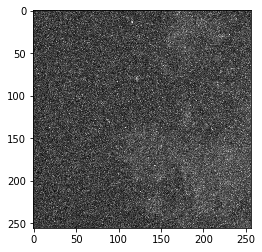

In [118]:
pic = load_pic(content_img_pths[picIndex])
pic_path = content_img_pths[picIndex]
plt.imshow(pic, cmap="gray")

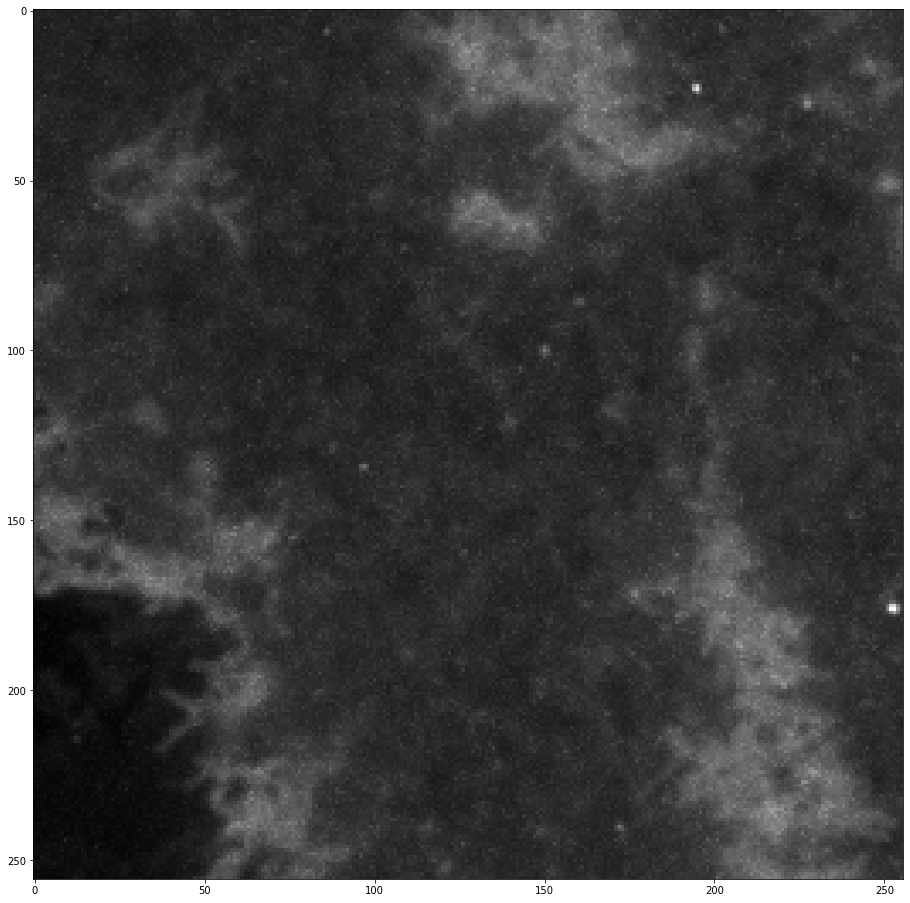

In [119]:
class_img_pths = []
cls_path = "../../../scratch/slivinskiy/SOFI/TestPics/"

cls_imgs = getImgs(cls_path, "*.TIF") + getImgs(cls_path, "*.png") + getImgs(cls_path, "*.jpg") + getImgs(cls_path, "*.tif")
class_img_pths.append(cls_imgs)

class_img_pths = class_img_pths[0]

fig=plt.figure(figsize=(16, 16))
columns = len(class_img_pths)
rows = 1
j = 0
for row_i in range(rows):
    for column_i in range(columns):
        if j>= columns*rows:
            break
        img = load_pic(class_img_pths[j])
        fig.add_subplot(rows,columns,j+1)
        plt.imshow(img, cmap = "gray")
        j+=1
plt.show()

In [120]:
goIntoFUNIT_MIX = "cd ../FUNIT_MIX ;"
outputName = "images/test_"+content_class+"_to_"+"mTurQ"+"_"+((str)(len(class_img_pths)))+".png"

In [121]:
! $goIntoFUNIT_MIX python test_k_shot.py --config outputs/funit_20_coloring/config.yaml --ckpt outputs/funit_20_coloring/checkpoints/gen_00100000.pt --input $pic_path --class_image_folder $cls_path --output $outputName

Set precision to: torch.float32
Compute average class codes for images in ../../../scratch/slivinskiy/SOFI/TestPics/
Shape:  torch.Size([1, 64, 1, 1])
Compute translation for ../../../scratch/slivinskiy/SOFI/train/rsTagRFP/rsTagRFP_screen_UV0pct_25.tif
Image has shape:  (282, 282)
MIN:  -0.2442872
MAX:  0.9971457
Image has shape now:  (282, 282)
Lossy conversion from float32 to uint8. Range [96.35338592529297, 254.63607788085938]. Convert image to uint8 prior to saving to suppress this warning.
Save output to images/test_rsTagRFP_to_mTurQ_1.png


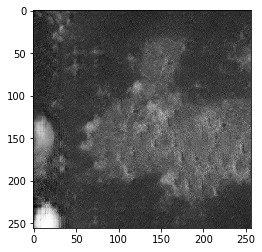

In [122]:
output_pic = load_pic("../FUNIT_MIX/"+outputName)
plt.imshow(output_pic, cmap="gray")

In [123]:
content_dir_path = "../../../scratch/slivinskiy/SOFI/train"
classes = next(os.walk(content_dir_path))[1]
def getRandomInputPics_Paths(count):
    content_class = classes[random.randint(0, len(classes)-1)]
    content_cls_path = os.path.join(content_dir_path, content_class)
    content_img_pths = getImgs(content_cls_path, "*.png") + getImgs(content_cls_path, "*.tif")
    
    img_paths = []
    fr = 0
    to = len(content_img_pths) -1
    for i in range(count):
        picIndex = random.randint(fr, to)
        img_paths.append(content_img_pths[picIndex])
        
    return img_paths

In [122]:
#ALL TOGETHER

inp_num = 5

class_img_pths = []
cls_path = "../../../scratch/slivinskiy/SOFI/TestPics/"

cls_imgs = getImgs(cls_path, "*.TIF") + getImgs(cls_path, "*.png") + getImgs(cls_path, "*.jpg") + getImgs(cls_path, "*.tif")
class_img_pths.append(cls_imgs)

class_img_pths = class_img_pths[0]

fig=plt.figure(figsize=(16, 8))
columns = max(inp_num, len(class_img_pths))
rows = 3


pic_paths = getRandomInputPics_Paths(inp_num)
content_class = pic_paths[0].split("/")[-2]

goIntoFUNIT_MIX = "cd ../FUNIT_MIX ;"

style = class_img_pths[0].split("/")[-1].split("_")[0]

output_pic_paths = []
fullpath = "../FUNIT_MIX/"
for i in range(len(pic_paths)):
    outputName = "images/test_"+content_class+"_"+((str)(i))+"_to_"+style+"_"+((str)(len(class_img_pths)))+".png"
    ! $goIntoFUNIT_MIX python test_k_shot.py --config outputs/funit_20_coloring/config.yaml --ckpt outputs/funit_20_coloring/checkpoints/gen_00100000.pt --input $pic_path --class_image_folder $cls_path --output $outputName
    output_pic_paths.append(fullpath+outputName)

output_pic = load_pic("../FUNIT_MIX/"+outputName)
#plt.imshow(output_pic, cmap="gray")

j=0
i=0
for column_i in range(columns):
    if i>= inp_num:
        break
    img = load_pic(pic_paths[i])
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(img, cmap = "gray")
    j+=1
    i+=1

j=columns
i=0
for column_i in range(columns):
    if i>= len(class_img_pths):
        break
    img = load_pic(class_img_pths[i])
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(img, cmap = "gray")
    j+=1
    i+=1
    
j=2*columns
i=0
for column_i in range(columns):
    if i>= inp_num:
        break
    img = load_pic(output_pic_paths[i])
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(img, cmap = "gray")
    j+=1
    i+=1
print("====DONE====")
print("Class: ", content_class, " to :",style)
plt.show()

ValueError: empty range for randrange() (0,0, 0)

<Figure size 1152x576 with 0 Axes>

INPUT IMAGE SHAPE:  (300, 300)
Set precision to: torch.float32
YOU HAVE INCLUDED RESIZING IN TEST-K-SHOT!!
Compute average class codes for images in ../../../scratch/slivinskiy/h5Totif/to/test
(1, 64, 256, 256)
Lossy conversion from float32 to uint8. Range [0.12151037156581879, 1.7503736019134521]. Convert image to uint8 prior to saving to suppress this warning.
(1, 128, 128, 128)
Lossy conversion from float32 to uint8. Range [0.26335400342941284, 4.140336513519287]. Convert image to uint8 prior to saving to suppress this warning.
(1, 256, 64, 64)
Lossy conversion from float32 to uint8. Range [0.41532620787620544, 11.15439224243164]. Convert image to uint8 prior to saving to suppress this warning.
(1, 256, 32, 32)
Lossy conversion from float32 to uint8. Range [3.035081148147583, 86.24101257324219]. Convert image to uint8 prior to saving to suppress this warning.
(1, 256, 16, 16)
Lossy conversion from float32 to uint8. Range [30.07350730895996, 297.15447998046875]. Convert image to uint

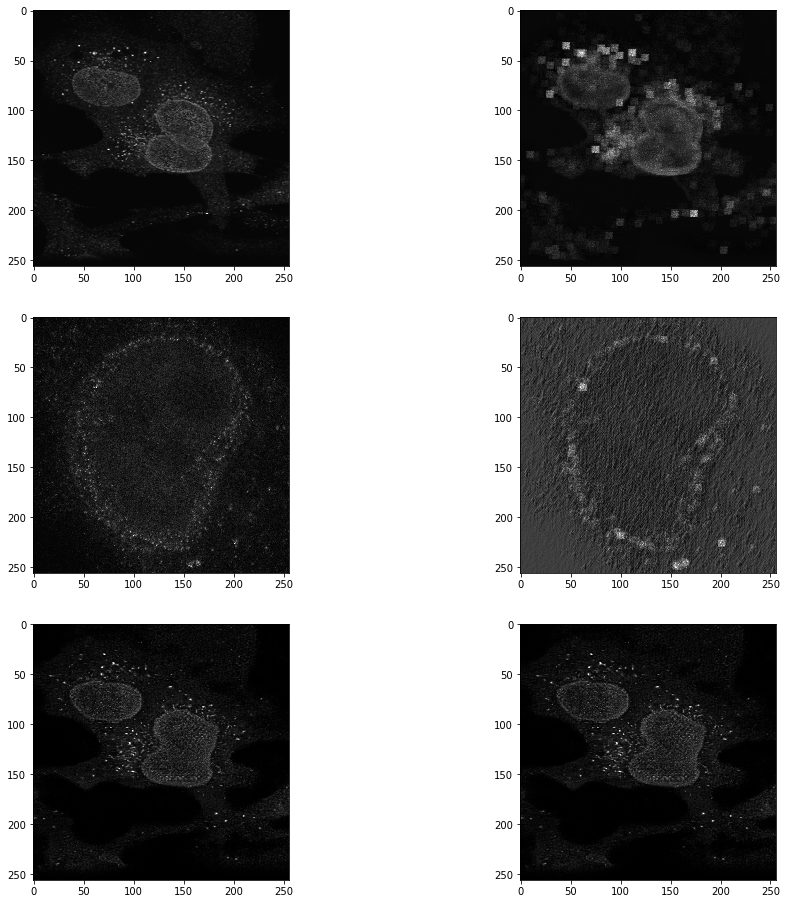

In [144]:
#Confocal - Sted
#ALL TOGETHER

content_dir_path = "../../../scratch/slivinskiy/h5Totif/from/test"

trained_model_path = "../../../scratch/slivinskiy/outputs_run_12_cells_multicellSted/"
checkpoint_path = trained_model_path+"checkpoints/gen_00150000.pt"
config_path = trained_model_path+"config.yaml"



classes = next(os.walk(content_dir_path))[1]
def getRandomInputPics_Paths(count):
    content_class = classes[random.randint(0, len(classes)-1)]
    content_cls_path = os.path.join(content_dir_path, content_class)
    content_img_pths = getImgs(content_cls_path, "*.png") + getImgs(content_cls_path, "*.tif")  + getImgs(content_cls_path, "*.jpg")
    
    img_paths = []
    fr = 0
    to = len(content_img_pths) -1
    for i in range(count):
        picIndex = random.randint(fr, to)
        img_paths.append(content_img_pths[picIndex])
        
    return img_paths

inp_num = 1

class_img_pths = []
cls_path = "../../../scratch/slivinskiy/h5Totif/to/test"

cls_imgs = getImgs(cls_path, "*.TIF") + getImgs(cls_path, "*.png") + getImgs(cls_path, "*.jpg") + getImgs(cls_path, "*.tif")
class_img_pths.append(cls_imgs)

class_img_pths = class_img_pths[0]

fig=plt.figure(figsize=(16, 16))
columns = max(inp_num, len(class_img_pths))
rows = 3


pic_paths = getRandomInputPics_Paths(inp_num)

print("INPUT IMAGE SHAPE: ", imread(pic_paths[0]).shape)

content_class = pic_paths[0].split("/")[-2]

goIntoFUNIT_MIX = "cd ../FUNIT_MIX ;"

style = class_img_pths[0].split("/")[-1].split("_")[0]
output_pic_paths = []
fullpath = "../FUNIT_MIX/"
for i in range(len(pic_paths)):
    pic_path = pic_paths[i]
    outputName = "images/test_"+content_class+"_"+((str)(i))+"_to_"+style+"_"+((str)(len(class_img_pths)))+".png"
    ! $goIntoFUNIT_MIX rm -rf pics ; mkdir pics
    ! $goIntoFUNIT_MIX python test_k_shot.py --config $config_path --ckpt $checkpoint_path --input $pic_path --class_image_folder $cls_path --output $outputName
    output_pic_paths.append(fullpath+outputName)

output_pic = load_pic("../FUNIT_MIX/"+outputName)
#plt.imshow(output_pic, cmap="gray")

j=0
i=0

columns = 2
for column_i in range(columns):
    if i>= inp_num:
        break
    img = load_pic(pic_paths[i])
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(img, cmap = "gray")
    j+=1
    i+=1
    
img = load_pic("../FUNIT_MIX/pics/pic_Content_Encoder_0_0.png")
fig.add_subplot(rows,columns, 2)
plt.imshow(img,cmap = "gray")
    
j=columns
i=0
for column_i in range(columns):
    if i>= len(class_img_pths):
        break
    img = load_pic(class_img_pths[i])
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(img, cmap = "gray")
    j+=1
    i+=1
    
img = load_pic("../FUNIT_MIX/pics/pic_ClassMode_Encoder_0_0.png")
fig.add_subplot(rows,columns, 4)
plt.imshow(img,cmap = "gray")
    
j=2*columns
i=0
for column_i in range(columns):
    if i>= inp_num:
        break
    img = load_pic(output_pic_paths[i])
    fig.add_subplot(rows,columns,j+1)
    plt.imshow(img, cmap = "gray")
    j+=1
    i+=1
    
img = load_pic("../FUNIT_MIX/pics/pic_Decoder_7_0.png")
fig.add_subplot(rows,columns, 6)
plt.imshow(img,cmap = "gray")    
    
print("====DONE====")
print("Class: ", content_class, " to :",style)
plt.show()

# **B022**

In [40]:
dir_path = "../../../scratch/slivinskiy/new_datasets/classes/Train"
classes = next(os.walk(dir_path))[1]
pth_list = []

for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    print("amount of imgs: ",len(cls_imgs))
    pth_list.append(cls_imgs)
print(len(classes))
print(classes)

amount of imgs:  34216
amount of imgs:  30760
amount of imgs:  34216
amount of imgs:  34216
amount of imgs:  34216
5
['OrigMito', 'OrigHoechst', 'OrigPh_golgi', 'OrigER', 'OrigSyto']


In [41]:
##Move to Val and Test
dir_path = "../../../scratch/slivinskiy/new_datasets/classes/Train"
out_path = "../../../scratch/slivinskiy/new_datasets/classes/Test"
classes = next(os.walk(dir_path))[1]
pth_list = []

amount = 3800
for cls in classes:
    print("class: ",cls)
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    for i in range(amount):
        img = cls_imgs[i]
        new_pth = os.path.join(out_path, cls)
        print("i: ",i)
        ! mv $img $new_pth

class:  OrigMito
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
i:  59
i:  60
i:  61
i:  62
i:  63
i:  64
i:  65
i:  66
i:  67
i:  68
i:  69
i:  70
i:  71
i:  72
i:  73
i:  74
i:  75
i:  76
i:  77
i:  78
i:  79
i:  80
i:  81
i:  82
i:  83
i:  84
i:  85
i:  86
i:  87
i:  88
i:  89
i:  90
i:  91
i:  92
i:  93
i:  94
i:  95
i:  96
i:  97
i:  98
i:  99
i:  100
i:  101
i:  102
i:  103
i:  104
i:  105
i:  106
i:  107
i:  108
i:  109
i:  110
i:  111
i:  112
i:  113
i:  114
i:  115
i:  116
i:  117
i:  118
i:  119
i:  120
i:  121
i:  122
i:  123
i:  124
i:  125
i:  126
i:  127
i:  128
i:  129
i:  130
i:  131
i:  132
i:  133
i:  134
i:  135
i:  1

i:  1032
i:  1033
i:  1034
i:  1035
i:  1036
i:  1037
i:  1038
i:  1039
i:  1040
i:  1041
i:  1042
i:  1043
i:  1044
i:  1045
i:  1046
i:  1047
i:  1048
i:  1049
i:  1050
i:  1051
i:  1052
i:  1053
i:  1054
i:  1055
i:  1056
i:  1057
i:  1058
i:  1059
i:  1060
i:  1061
i:  1062
i:  1063
i:  1064
i:  1065
i:  1066
i:  1067
i:  1068
i:  1069
i:  1070
i:  1071
i:  1072
i:  1073
i:  1074
i:  1075
i:  1076
i:  1077
i:  1078
i:  1079
i:  1080
i:  1081
i:  1082
i:  1083
i:  1084
i:  1085
i:  1086
i:  1087
i:  1088
i:  1089
i:  1090
i:  1091
i:  1092
i:  1093
i:  1094
i:  1095
i:  1096
i:  1097
i:  1098
i:  1099
i:  1100
i:  1101
i:  1102
i:  1103
i:  1104
i:  1105
i:  1106
i:  1107
i:  1108
i:  1109
i:  1110
i:  1111
i:  1112
i:  1113
i:  1114
i:  1115
i:  1116
i:  1117
i:  1118
i:  1119
i:  1120
i:  1121
i:  1122
i:  1123
i:  1124
i:  1125
i:  1126
i:  1127
i:  1128
i:  1129
i:  1130
i:  1131
i:  1132
i:  1133
i:  1134
i:  1135
i:  1136
i:  1137
i:  1138
i:  1139
i:  1140
i:  1141
i:  1142
i

i:  1943
i:  1944
i:  1945
i:  1946
i:  1947
i:  1948
i:  1949
i:  1950
i:  1951
i:  1952
i:  1953
i:  1954
i:  1955
i:  1956
i:  1957
i:  1958
i:  1959
i:  1960
i:  1961
i:  1962
i:  1963
i:  1964
i:  1965
i:  1966
i:  1967
i:  1968
i:  1969
i:  1970
i:  1971
i:  1972
i:  1973
i:  1974
i:  1975
i:  1976
i:  1977
i:  1978
i:  1979
i:  1980
i:  1981
i:  1982
i:  1983
i:  1984
i:  1985
i:  1986
i:  1987
i:  1988
i:  1989
i:  1990
i:  1991
i:  1992
i:  1993
i:  1994
i:  1995
i:  1996
i:  1997
i:  1998
i:  1999
i:  2000
i:  2001
i:  2002
i:  2003
i:  2004
i:  2005
i:  2006
i:  2007
i:  2008
i:  2009
i:  2010
i:  2011
i:  2012
i:  2013
i:  2014
i:  2015
i:  2016
i:  2017
i:  2018
i:  2019
i:  2020
i:  2021
i:  2022
i:  2023
i:  2024
i:  2025
i:  2026
i:  2027
i:  2028
i:  2029
i:  2030
i:  2031
i:  2032
i:  2033
i:  2034
i:  2035
i:  2036
i:  2037
i:  2038
i:  2039
i:  2040
i:  2041
i:  2042
i:  2043
i:  2044
i:  2045
i:  2046
i:  2047
i:  2048
i:  2049
i:  2050
i:  2051
i:  2052
i:  2053
i

i:  2854
i:  2855
i:  2856
i:  2857
i:  2858
i:  2859
i:  2860
i:  2861
i:  2862
i:  2863
i:  2864
i:  2865
i:  2866
i:  2867
i:  2868
i:  2869
i:  2870
i:  2871
i:  2872
i:  2873
i:  2874
i:  2875
i:  2876
i:  2877
i:  2878
i:  2879
i:  2880
i:  2881
i:  2882
i:  2883
i:  2884
i:  2885
i:  2886
i:  2887
i:  2888
i:  2889
i:  2890
i:  2891
i:  2892
i:  2893
i:  2894
i:  2895
i:  2896
i:  2897
i:  2898
i:  2899
i:  2900
i:  2901
i:  2902
i:  2903
i:  2904
i:  2905
i:  2906
i:  2907
i:  2908
i:  2909
i:  2910
i:  2911
i:  2912
i:  2913
i:  2914
i:  2915
i:  2916
i:  2917
i:  2918
i:  2919
i:  2920
i:  2921
i:  2922
i:  2923
i:  2924
i:  2925
i:  2926
i:  2927
i:  2928
i:  2929
i:  2930
i:  2931
i:  2932
i:  2933
i:  2934
i:  2935
i:  2936
i:  2937
i:  2938
i:  2939
i:  2940
i:  2941
i:  2942
i:  2943
i:  2944
i:  2945
i:  2946
i:  2947
i:  2948
i:  2949
i:  2950
i:  2951
i:  2952
i:  2953
i:  2954
i:  2955
i:  2956
i:  2957
i:  2958
i:  2959
i:  2960
i:  2961
i:  2962
i:  2963
i:  2964
i

i:  3765
i:  3766
i:  3767
i:  3768
i:  3769
i:  3770
i:  3771
i:  3772
i:  3773
i:  3774
i:  3775
i:  3776
i:  3777
i:  3778
i:  3779
i:  3780
i:  3781
i:  3782
i:  3783
i:  3784
i:  3785
i:  3786
i:  3787
i:  3788
i:  3789
i:  3790
i:  3791
i:  3792
i:  3793
i:  3794
i:  3795
i:  3796
i:  3797
i:  3798
i:  3799
class:  OrigHoechst
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49
i:  50
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
i:  59
i:  60
i:  61
i:  62
i:  63
i:  64
i:  65
i:  66
i:  67
i:  68
i:  69
i:  70
i:  71
i:  72
i:  73
i:  74
i:  75
i:  76
i:  77
i:  78
i:  79
i:  80
i:  81
i:  82
i:  83
i:  84
i:  85
i:  86
i:  87
i:  88
i:  89
i:  90
i:  91
i:  92
i:  93
i:  94
i:  95
i: 

i:  996
i:  997
i:  998
i:  999
i:  1000
i:  1001
i:  1002
i:  1003
i:  1004
i:  1005
i:  1006
i:  1007
i:  1008
i:  1009
i:  1010
i:  1011
i:  1012
i:  1013
i:  1014
i:  1015
i:  1016
i:  1017
i:  1018
i:  1019
i:  1020
i:  1021
i:  1022
i:  1023
i:  1024
i:  1025
i:  1026
i:  1027
i:  1028
i:  1029
i:  1030
i:  1031
i:  1032
i:  1033
i:  1034
i:  1035
i:  1036
i:  1037
i:  1038
i:  1039
i:  1040
i:  1041
i:  1042
i:  1043
i:  1044
i:  1045
i:  1046
i:  1047
i:  1048
i:  1049
i:  1050
i:  1051
i:  1052
i:  1053
i:  1054
i:  1055
i:  1056
i:  1057
i:  1058
i:  1059
i:  1060
i:  1061
i:  1062
i:  1063
i:  1064
i:  1065
i:  1066
i:  1067
i:  1068
i:  1069
i:  1070
i:  1071
i:  1072
i:  1073
i:  1074
i:  1075
i:  1076
i:  1077
i:  1078
i:  1079
i:  1080
i:  1081
i:  1082
i:  1083
i:  1084
i:  1085
i:  1086
i:  1087
i:  1088
i:  1089
i:  1090
i:  1091
i:  1092
i:  1093
i:  1094
i:  1095
i:  1096
i:  1097
i:  1098
i:  1099
i:  1100
i:  1101
i:  1102
i:  1103
i:  1104
i:  1105
i:  1106
i:  1

i:  1907
i:  1908
i:  1909
i:  1910
i:  1911
i:  1912
i:  1913
i:  1914
i:  1915
i:  1916
i:  1917
i:  1918
i:  1919
i:  1920
i:  1921
i:  1922
i:  1923
i:  1924
i:  1925
i:  1926
i:  1927
i:  1928
i:  1929
i:  1930
i:  1931
i:  1932
i:  1933
i:  1934
i:  1935
i:  1936
i:  1937
i:  1938
i:  1939
i:  1940
i:  1941
i:  1942
i:  1943
i:  1944
i:  1945
i:  1946
i:  1947
i:  1948
i:  1949
i:  1950
i:  1951
i:  1952
i:  1953
i:  1954
i:  1955
i:  1956
i:  1957
i:  1958
i:  1959
i:  1960
i:  1961
i:  1962
i:  1963
i:  1964
i:  1965
i:  1966
i:  1967
i:  1968
i:  1969
i:  1970
i:  1971
i:  1972
i:  1973
i:  1974
i:  1975
i:  1976
i:  1977
i:  1978
i:  1979
i:  1980
i:  1981
i:  1982
i:  1983
i:  1984
i:  1985
i:  1986
i:  1987
i:  1988
i:  1989
i:  1990
i:  1991
i:  1992
i:  1993
i:  1994
i:  1995
i:  1996
i:  1997
i:  1998
i:  1999
i:  2000
i:  2001
i:  2002
i:  2003
i:  2004
i:  2005
i:  2006
i:  2007
i:  2008
i:  2009
i:  2010
i:  2011
i:  2012
i:  2013
i:  2014
i:  2015
i:  2016
i:  2017
i

i:  2818
i:  2819
i:  2820
i:  2821
i:  2822
i:  2823
i:  2824
i:  2825
i:  2826
i:  2827
i:  2828
i:  2829
i:  2830
i:  2831
i:  2832
i:  2833
i:  2834
i:  2835
i:  2836
i:  2837
i:  2838
i:  2839
i:  2840
i:  2841
i:  2842
i:  2843
i:  2844
i:  2845
i:  2846
i:  2847
i:  2848
i:  2849
i:  2850
i:  2851
i:  2852
i:  2853
i:  2854
i:  2855
i:  2856
i:  2857
i:  2858
i:  2859
i:  2860
i:  2861
i:  2862
i:  2863
i:  2864
i:  2865
i:  2866
i:  2867
i:  2868
i:  2869
i:  2870
i:  2871
i:  2872
i:  2873
i:  2874
i:  2875
i:  2876
i:  2877
i:  2878
i:  2879
i:  2880
i:  2881
i:  2882
i:  2883
i:  2884
i:  2885
i:  2886
i:  2887
i:  2888
i:  2889
i:  2890
i:  2891
i:  2892
i:  2893
i:  2894
i:  2895
i:  2896
i:  2897
i:  2898
i:  2899
i:  2900
i:  2901
i:  2902
i:  2903
i:  2904
i:  2905
i:  2906
i:  2907
i:  2908
i:  2909
i:  2910
i:  2911
i:  2912
i:  2913
i:  2914
i:  2915
i:  2916
i:  2917
i:  2918
i:  2919
i:  2920
i:  2921
i:  2922
i:  2923
i:  2924
i:  2925
i:  2926
i:  2927
i:  2928
i

i:  3729
i:  3730
i:  3731
i:  3732
i:  3733
i:  3734
i:  3735
i:  3736
i:  3737
i:  3738
i:  3739
i:  3740
i:  3741
i:  3742
i:  3743
i:  3744
i:  3745
i:  3746
i:  3747
i:  3748
i:  3749
i:  3750
i:  3751
i:  3752
i:  3753
i:  3754
i:  3755
i:  3756
i:  3757
i:  3758
i:  3759
i:  3760
i:  3761
i:  3762
i:  3763
i:  3764
i:  3765
i:  3766
i:  3767
i:  3768
i:  3769
i:  3770
i:  3771
i:  3772
i:  3773
i:  3774
i:  3775
i:  3776
i:  3777
i:  3778
i:  3779
i:  3780
i:  3781
i:  3782
i:  3783
i:  3784
i:  3785
i:  3786
i:  3787
i:  3788
i:  3789
i:  3790
i:  3791
i:  3792
i:  3793
i:  3794
i:  3795
i:  3796
i:  3797
i:  3798
i:  3799
class:  OrigPh_golgi
i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
i:  31
i:  32
i:  33
i:  34
i:  35
i:  36
i:  37
i:  38
i:  39
i:  40
i:  41
i:  42
i:  43
i:  44
i:  45
i:  46
i:  47
i:  48
i:  49


i:  956
i:  957
i:  958
i:  959
i:  960
i:  961
i:  962
i:  963
i:  964
i:  965
i:  966
i:  967
i:  968
i:  969
i:  970
i:  971
i:  972
i:  973
i:  974
i:  975
i:  976
i:  977
i:  978
i:  979
i:  980
i:  981
i:  982
i:  983
i:  984
i:  985
i:  986
i:  987
i:  988
i:  989
i:  990
i:  991
i:  992
i:  993
i:  994
i:  995
i:  996
i:  997
i:  998
i:  999
i:  1000
i:  1001
i:  1002
i:  1003
i:  1004
i:  1005
i:  1006
i:  1007
i:  1008
i:  1009
i:  1010
i:  1011
i:  1012
i:  1013
i:  1014
i:  1015
i:  1016
i:  1017
i:  1018
i:  1019
i:  1020
i:  1021
i:  1022
i:  1023
i:  1024
i:  1025
i:  1026
i:  1027
i:  1028
i:  1029
i:  1030
i:  1031
i:  1032
i:  1033
i:  1034
i:  1035
i:  1036
i:  1037
i:  1038
i:  1039
i:  1040
i:  1041
i:  1042
i:  1043
i:  1044
i:  1045
i:  1046
i:  1047
i:  1048
i:  1049
i:  1050
i:  1051
i:  1052
i:  1053
i:  1054
i:  1055
i:  1056
i:  1057
i:  1058
i:  1059
i:  1060
i:  1061
i:  1062
i:  1063
i:  1064
i:  1065
i:  1066
i:  1067
i:  1068
i:  1069
i:  1070
i:  1071


i:  1872
i:  1873
i:  1874
i:  1875
i:  1876
i:  1877
i:  1878
i:  1879
i:  1880
i:  1881
i:  1882
i:  1883
i:  1884
i:  1885
i:  1886
i:  1887
i:  1888
i:  1889
i:  1890
i:  1891
i:  1892
i:  1893
i:  1894
i:  1895
i:  1896
i:  1897
i:  1898
i:  1899
i:  1900
i:  1901
i:  1902
i:  1903
i:  1904
i:  1905
i:  1906
i:  1907
i:  1908
i:  1909
i:  1910
i:  1911
i:  1912
i:  1913
i:  1914
i:  1915
i:  1916
i:  1917
i:  1918
i:  1919
i:  1920
i:  1921
i:  1922
i:  1923
i:  1924
i:  1925
i:  1926
i:  1927
i:  1928
i:  1929
i:  1930
i:  1931
i:  1932
i:  1933
i:  1934
i:  1935
i:  1936
i:  1937
i:  1938
i:  1939
i:  1940
i:  1941
i:  1942
i:  1943
i:  1944
i:  1945
i:  1946
i:  1947
i:  1948
i:  1949
i:  1950
i:  1951
i:  1952
i:  1953
i:  1954
i:  1955
i:  1956
i:  1957
i:  1958
i:  1959
i:  1960
i:  1961
i:  1962
i:  1963
i:  1964
i:  1965
i:  1966
i:  1967
i:  1968
i:  1969
i:  1970
i:  1971
i:  1972
i:  1973
i:  1974
i:  1975
i:  1976
i:  1977
i:  1978
i:  1979
i:  1980
i:  1981
i:  1982
i

i:  2783
i:  2784
i:  2785
i:  2786
i:  2787
i:  2788
i:  2789
i:  2790
i:  2791
i:  2792
i:  2793
i:  2794
i:  2795
i:  2796
i:  2797
i:  2798
i:  2799
i:  2800
i:  2801
i:  2802
i:  2803
i:  2804
i:  2805
i:  2806
i:  2807
i:  2808
i:  2809
i:  2810
i:  2811
i:  2812
i:  2813
i:  2814
i:  2815
i:  2816
i:  2817
i:  2818
i:  2819
i:  2820
i:  2821
i:  2822
i:  2823
i:  2824
i:  2825
i:  2826
i:  2827
i:  2828
i:  2829
i:  2830
i:  2831
i:  2832
i:  2833
i:  2834
i:  2835
i:  2836
i:  2837
i:  2838
i:  2839
i:  2840
i:  2841
i:  2842
i:  2843
i:  2844
i:  2845
i:  2846
i:  2847
i:  2848
i:  2849
i:  2850
i:  2851
i:  2852
i:  2853
i:  2854
i:  2855
i:  2856
i:  2857
i:  2858
i:  2859
i:  2860
i:  2861
i:  2862
i:  2863
i:  2864
i:  2865
i:  2866
i:  2867
i:  2868
i:  2869
i:  2870
i:  2871
i:  2872
i:  2873
i:  2874
i:  2875
i:  2876
i:  2877
i:  2878
i:  2879
i:  2880
i:  2881
i:  2882
i:  2883
i:  2884
i:  2885
i:  2886
i:  2887
i:  2888
i:  2889
i:  2890
i:  2891
i:  2892
i:  2893
i

i:  3694
i:  3695
i:  3696
i:  3697
i:  3698
i:  3699
i:  3700
i:  3701
i:  3702
i:  3703
i:  3704
i:  3705
i:  3706
i:  3707
i:  3708
i:  3709
i:  3710
i:  3711
i:  3712
i:  3713
i:  3714
i:  3715
i:  3716
i:  3717
i:  3718
i:  3719
i:  3720
i:  3721
i:  3722
i:  3723
i:  3724
i:  3725
i:  3726
i:  3727
i:  3728
i:  3729
i:  3730
i:  3731
i:  3732
i:  3733
i:  3734
i:  3735
i:  3736
i:  3737
i:  3738
i:  3739
i:  3740
i:  3741
i:  3742
i:  3743
i:  3744
i:  3745
i:  3746
i:  3747
i:  3748
i:  3749
i:  3750
i:  3751
i:  3752
i:  3753
i:  3754
i:  3755
i:  3756
i:  3757
i:  3758
i:  3759
i:  3760
i:  3761
i:  3762
i:  3763
i:  3764
i:  3765
i:  3766
i:  3767
i:  3768
i:  3769
i:  3770
i:  3771
i:  3772
i:  3773
i:  3774
i:  3775
i:  3776
i:  3777
i:  3778
i:  3779
i:  3780
i:  3781
i:  3782
i:  3783
i:  3784
i:  3785
i:  3786
i:  3787
i:  3788
i:  3789
i:  3790
i:  3791
i:  3792
i:  3793
i:  3794
i:  3795
i:  3796
i:  3797
i:  3798
i:  3799
class:  OrigER
i:  0
i:  1
i:  2
i:  3
i:  4
i

i:  917
i:  918
i:  919
i:  920
i:  921
i:  922
i:  923
i:  924
i:  925
i:  926
i:  927
i:  928
i:  929
i:  930
i:  931
i:  932
i:  933
i:  934
i:  935
i:  936
i:  937
i:  938
i:  939
i:  940
i:  941
i:  942
i:  943
i:  944
i:  945
i:  946
i:  947
i:  948
i:  949
i:  950
i:  951
i:  952
i:  953
i:  954
i:  955
i:  956
i:  957
i:  958
i:  959
i:  960
i:  961
i:  962
i:  963
i:  964
i:  965
i:  966
i:  967
i:  968
i:  969
i:  970
i:  971
i:  972
i:  973
i:  974
i:  975
i:  976
i:  977
i:  978
i:  979
i:  980
i:  981
i:  982
i:  983
i:  984
i:  985
i:  986
i:  987
i:  988
i:  989
i:  990
i:  991
i:  992
i:  993
i:  994
i:  995
i:  996
i:  997
i:  998
i:  999
i:  1000
i:  1001
i:  1002
i:  1003
i:  1004
i:  1005
i:  1006
i:  1007
i:  1008
i:  1009
i:  1010
i:  1011
i:  1012
i:  1013
i:  1014
i:  1015
i:  1016
i:  1017
i:  1018
i:  1019
i:  1020
i:  1021
i:  1022
i:  1023
i:  1024
i:  1025
i:  1026
i:  1027
i:  1028
i:  1029
i:  1030
i:  1031
i:  1032
i:  1033
i:  1034
i:  1035
i:  1036
i: 

i:  1837
i:  1838
i:  1839
i:  1840
i:  1841
i:  1842
i:  1843
i:  1844
i:  1845
i:  1846
i:  1847
i:  1848
i:  1849
i:  1850
i:  1851
i:  1852
i:  1853
i:  1854
i:  1855
i:  1856
i:  1857
i:  1858
i:  1859
i:  1860
i:  1861
i:  1862
i:  1863
i:  1864
i:  1865
i:  1866
i:  1867
i:  1868
i:  1869
i:  1870
i:  1871
i:  1872
i:  1873
i:  1874
i:  1875
i:  1876
i:  1877
i:  1878
i:  1879
i:  1880
i:  1881
i:  1882
i:  1883
i:  1884
i:  1885
i:  1886
i:  1887
i:  1888
i:  1889
i:  1890
i:  1891
i:  1892
i:  1893
i:  1894
i:  1895
i:  1896
i:  1897
i:  1898
i:  1899
i:  1900
i:  1901
i:  1902
i:  1903
i:  1904
i:  1905
i:  1906
i:  1907
i:  1908
i:  1909
i:  1910
i:  1911
i:  1912
i:  1913
i:  1914
i:  1915
i:  1916
i:  1917
i:  1918
i:  1919
i:  1920
i:  1921
i:  1922
i:  1923
i:  1924
i:  1925
i:  1926
i:  1927
i:  1928
i:  1929
i:  1930
i:  1931
i:  1932
i:  1933
i:  1934
i:  1935
i:  1936
i:  1937
i:  1938
i:  1939
i:  1940
i:  1941
i:  1942
i:  1943
i:  1944
i:  1945
i:  1946
i:  1947
i

i:  2748
i:  2749
i:  2750
i:  2751
i:  2752
i:  2753
i:  2754
i:  2755
i:  2756
i:  2757
i:  2758
i:  2759
i:  2760
i:  2761
i:  2762
i:  2763
i:  2764
i:  2765
i:  2766
i:  2767
i:  2768
i:  2769
i:  2770
i:  2771
i:  2772
i:  2773
i:  2774
i:  2775
i:  2776
i:  2777
i:  2778
i:  2779
i:  2780
i:  2781
i:  2782
i:  2783
i:  2784
i:  2785
i:  2786
i:  2787
i:  2788
i:  2789
i:  2790
i:  2791
i:  2792
i:  2793
i:  2794
i:  2795
i:  2796
i:  2797
i:  2798
i:  2799
i:  2800
i:  2801
i:  2802
i:  2803
i:  2804
i:  2805
i:  2806
i:  2807
i:  2808
i:  2809
i:  2810
i:  2811
i:  2812
i:  2813
i:  2814
i:  2815
i:  2816
i:  2817
i:  2818
i:  2819
i:  2820
i:  2821
i:  2822
i:  2823
i:  2824
i:  2825
i:  2826
i:  2827
i:  2828
i:  2829
i:  2830
i:  2831
i:  2832
i:  2833
i:  2834
i:  2835
i:  2836
i:  2837
i:  2838
i:  2839
i:  2840
i:  2841
i:  2842
i:  2843
i:  2844
i:  2845
i:  2846
i:  2847
i:  2848
i:  2849
i:  2850
i:  2851
i:  2852
i:  2853
i:  2854
i:  2855
i:  2856
i:  2857
i:  2858
i

i:  3659
i:  3660
i:  3661
i:  3662
i:  3663
i:  3664
i:  3665
i:  3666
i:  3667
i:  3668
i:  3669
i:  3670
i:  3671
i:  3672
i:  3673
i:  3674
i:  3675
i:  3676
i:  3677
i:  3678
i:  3679
i:  3680
i:  3681
i:  3682
i:  3683
i:  3684
i:  3685
i:  3686
i:  3687
i:  3688
i:  3689
i:  3690
i:  3691
i:  3692
i:  3693
i:  3694
i:  3695
i:  3696
i:  3697
i:  3698
i:  3699
i:  3700
i:  3701
i:  3702
i:  3703
i:  3704
i:  3705
i:  3706
i:  3707
i:  3708
i:  3709
i:  3710
i:  3711
i:  3712
i:  3713
i:  3714
i:  3715
i:  3716
i:  3717
i:  3718
i:  3719
i:  3720
i:  3721
i:  3722
i:  3723
i:  3724
i:  3725
i:  3726
i:  3727
i:  3728
i:  3729
i:  3730
i:  3731
i:  3732
i:  3733
i:  3734
i:  3735
i:  3736
i:  3737
i:  3738
i:  3739
i:  3740
i:  3741
i:  3742
i:  3743
i:  3744
i:  3745
i:  3746
i:  3747
i:  3748
i:  3749
i:  3750
i:  3751
i:  3752
i:  3753
i:  3754
i:  3755
i:  3756
i:  3757
i:  3758
i:  3759
i:  3760
i:  3761
i:  3762
i:  3763
i:  3764
i:  3765
i:  3766
i:  3767
i:  3768
i:  3769
i

i:  878
i:  879
i:  880
i:  881
i:  882
i:  883
i:  884
i:  885
i:  886
i:  887
i:  888
i:  889
i:  890
i:  891
i:  892
i:  893
i:  894
i:  895
i:  896
i:  897
i:  898
i:  899
i:  900
i:  901
i:  902
i:  903
i:  904
i:  905
i:  906
i:  907
i:  908
i:  909
i:  910
i:  911
i:  912
i:  913
i:  914
i:  915
i:  916
i:  917
i:  918
i:  919
i:  920
i:  921
i:  922
i:  923
i:  924
i:  925
i:  926
i:  927
i:  928
i:  929
i:  930
i:  931
i:  932
i:  933
i:  934
i:  935
i:  936
i:  937
i:  938
i:  939
i:  940
i:  941
i:  942
i:  943
i:  944
i:  945
i:  946
i:  947
i:  948
i:  949
i:  950
i:  951
i:  952
i:  953
i:  954
i:  955
i:  956
i:  957
i:  958
i:  959
i:  960
i:  961
i:  962
i:  963
i:  964
i:  965
i:  966
i:  967
i:  968
i:  969
i:  970
i:  971
i:  972
i:  973
i:  974
i:  975
i:  976
i:  977
i:  978
i:  979
i:  980
i:  981
i:  982
i:  983
i:  984
i:  985
i:  986
i:  987
i:  988
i:  989
i:  990
i:  991
i:  992
i:  993
i:  994
i:  995
i:  996
i:  997
i:  998
i:  999
i:  1000
i:  1001
i:  10

i:  1802
i:  1803
i:  1804
i:  1805
i:  1806
i:  1807
i:  1808
i:  1809
i:  1810
i:  1811
i:  1812
i:  1813
i:  1814
i:  1815
i:  1816
i:  1817
i:  1818
i:  1819
i:  1820
i:  1821
i:  1822
i:  1823
i:  1824
i:  1825
i:  1826
i:  1827
i:  1828
i:  1829
i:  1830
i:  1831
i:  1832
i:  1833
i:  1834
i:  1835
i:  1836
i:  1837
i:  1838
i:  1839
i:  1840
i:  1841
i:  1842
i:  1843
i:  1844
i:  1845
i:  1846
i:  1847
i:  1848
i:  1849
i:  1850
i:  1851
i:  1852
i:  1853
i:  1854
i:  1855
i:  1856
i:  1857
i:  1858
i:  1859
i:  1860
i:  1861
i:  1862
i:  1863
i:  1864
i:  1865
i:  1866
i:  1867
i:  1868
i:  1869
i:  1870
i:  1871
i:  1872
i:  1873
i:  1874
i:  1875
i:  1876
i:  1877
i:  1878
i:  1879
i:  1880
i:  1881
i:  1882
i:  1883
i:  1884
i:  1885
i:  1886
i:  1887
i:  1888
i:  1889
i:  1890
i:  1891
i:  1892
i:  1893
i:  1894
i:  1895
i:  1896
i:  1897
i:  1898
i:  1899
i:  1900
i:  1901
i:  1902
i:  1903
i:  1904
i:  1905
i:  1906
i:  1907
i:  1908
i:  1909
i:  1910
i:  1911
i:  1912
i

i:  2713
i:  2714
i:  2715
i:  2716
i:  2717
i:  2718
i:  2719
i:  2720
i:  2721
i:  2722
i:  2723
i:  2724
i:  2725
i:  2726
i:  2727
i:  2728
i:  2729
i:  2730
i:  2731
i:  2732
i:  2733
i:  2734
i:  2735
i:  2736
i:  2737
i:  2738
i:  2739
i:  2740
i:  2741
i:  2742
i:  2743
i:  2744
i:  2745
i:  2746
i:  2747
i:  2748
i:  2749
i:  2750
i:  2751
i:  2752
i:  2753
i:  2754
i:  2755
i:  2756
i:  2757
i:  2758
i:  2759
i:  2760
i:  2761
i:  2762
i:  2763
i:  2764
i:  2765
i:  2766
i:  2767
i:  2768
i:  2769
i:  2770
i:  2771
i:  2772
i:  2773
i:  2774
i:  2775
i:  2776
i:  2777
i:  2778
i:  2779
i:  2780
i:  2781
i:  2782
i:  2783
i:  2784
i:  2785
i:  2786
i:  2787
i:  2788
i:  2789
i:  2790
i:  2791
i:  2792
i:  2793
i:  2794
i:  2795
i:  2796
i:  2797
i:  2798
i:  2799
i:  2800
i:  2801
i:  2802
i:  2803
i:  2804
i:  2805
i:  2806
i:  2807
i:  2808
i:  2809
i:  2810
i:  2811
i:  2812
i:  2813
i:  2814
i:  2815
i:  2816
i:  2817
i:  2818
i:  2819
i:  2820
i:  2821
i:  2822
i:  2823
i

i:  3624
i:  3625
i:  3626
i:  3627
i:  3628
i:  3629
i:  3630
i:  3631
i:  3632
i:  3633
i:  3634
i:  3635
i:  3636
i:  3637
i:  3638
i:  3639
i:  3640
i:  3641
i:  3642
i:  3643
i:  3644
i:  3645
i:  3646
i:  3647
i:  3648
i:  3649
i:  3650
i:  3651
i:  3652
i:  3653
i:  3654
i:  3655
i:  3656
i:  3657
i:  3658
i:  3659
i:  3660
i:  3661
i:  3662
i:  3663
i:  3664
i:  3665
i:  3666
i:  3667
i:  3668
i:  3669
i:  3670
i:  3671
i:  3672
i:  3673
i:  3674
i:  3675
i:  3676
i:  3677
i:  3678
i:  3679
i:  3680
i:  3681
i:  3682
i:  3683
i:  3684
i:  3685
i:  3686
i:  3687
i:  3688
i:  3689
i:  3690
i:  3691
i:  3692
i:  3693
i:  3694
i:  3695
i:  3696
i:  3697
i:  3698
i:  3699
i:  3700
i:  3701
i:  3702
i:  3703
i:  3704
i:  3705
i:  3706
i:  3707
i:  3708
i:  3709
i:  3710
i:  3711
i:  3712
i:  3713
i:  3714
i:  3715
i:  3716
i:  3717
i:  3718
i:  3719
i:  3720
i:  3721
i:  3722
i:  3723
i:  3724
i:  3725
i:  3726
i:  3727
i:  3728
i:  3729
i:  3730
i:  3731
i:  3732
i:  3733
i:  3734
i

In [22]:
for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    tifs = cls_pth + "/*.tif"
    ! mv $tifs $dir_path

In [170]:
import csv

In [177]:
in_path = "../../../scratch/slivinskiy/new_datasets/imgs"
out_path = "../../../scratch/slivinskiy/new_datasets/classes"

In [36]:
classes = ["OrigER", "OrigHoechst", "OrigMito", "OrigPh_golgi", "OrigSyto"]
for cls in classes:
    pth = os.path.join("../../../scratch/slivinskiy/new_datasets/classes/Val",cls)
    ! mkdir $pth

In [ ]:
with open('../../../scratch/slivinskiy/new_datasets/conf/BBBC022_v1_image.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',', quotechar = '"')
    classes = ["OrigER", "OrigHoechst", "OrigMito", "OrigPh_golgi", "OrigSyto"]
    index = 0
    for row in readCSV:
        for j in range(1,6):
            pic_path = os.path.join(in_path, row[j])
            save_path = os.path.join(out_path, classes[j-1])
            if (os.path.exists(pic_path)):
                ! mv $pic_path $save_path